<h1 style="color: #13907bff;"> Задание №1. Ответы на вопросы.</h1>

<h3 style="color: #3498db;">Вопрос 1:  Определить аналитическое решение задачи регрессии в векторной форме.</h3>

<h4 style="color: #7f8c8d;">Постановка задачи.</h4>

 Пусть у нас есть ___обучающая выборка___ $\mathbf{X}^{n*m}$ $\in$ $\mathcal{R^{n*m}}$, состоящая из признаков (__features__) &mdash; ($x^1_1$, $x^2_1$..... $x^n_1$, $x^1_2$, $x^2_2$..... $x^n_m$), которую также называют ___матрицей признаков___ (__feature matrix__), а также _вектор_ __y^n__ $\in$ $\mathcal{R^n}$, называемый ___вектором целевых значений___ (__target vector__)

___Линейной регрессией___ (__linear regression__) будем называть модель $\hat{y}$ = $\mathbf{X}\omega$, где $\hat{y}$ $\in$ $\mathcal{R^n}$ - ___предсказание модели___, а $\omega\in\mathcal{R^m}$ - _вектор весов_, __наилучшим__ образом апроксимирующий модель. Собственно, вектор весов $\omega$ - ___искомое___ в данной задаче.

<h4 style="color: #7f8c8d;">Минимизация функции потерь (MSE)</h4>

В качестве критерия точности модели в задаче регрессии используется ___средне-квадратичная функция ошибки___ (__Mean Squared Error или__ $MSE$ ). В векторной форме, в частности, она записывается так:

$$ L(\omega) = \frac{1}{n}\|\mathbf{y} - \mathbf{X}\omega\|^2_2 = \frac{1}{n}\ (y - \mathbf{X}\omega)^T(y - \mathbf{X}\omega) $$

Где $|| * ||_2$ - это стандартная __Евклидова норма__.

Для минимизации данной квадратичной функции потерь раскроем скобки и найдем ее градиент по направлению вектора весов $\omega$ :

$$\nabla_wL(\omega) = \nabla_w\frac{1}{n}(y^Ty - 2\omega^T\mathbf{X}^Ty + \omega^T\mathbf{X}^T\mathbf{X}\omega) = \frac{2}{n}(\mathbf{X}^T\mathbf{X}\omega - \mathbf{X}^Ty) $$

Теперь результирующую матричную функцию приравниваем к нулю и получаем систему линейных уравнений:

$$ \mathbf{X}^T\mathbf{X}\omega = \mathbf{X}^Ty $$

<h4 style="color: #7f8c8d;">Условия применимости и ограничения</h4>

Аналитическое решение существует, когда матрица $\mathbf{X}^T\mathbf{X}$ - обратима, что выполняетс, если признаки линейно независимы между собой, что эквивалентно тому, что уравнений больше, чем переменных. Если это выполнено, то аналитическое решение имеет вид:

$$ \omega^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty $$

В рамках задачи линейной регрессии _линейная независимость_ признаков эквивалентна ___отсутствию мультиколлинеарности (линейной зависимости)___ между ними, а условие на _количество уравнений_ эквивалентно тому, что ___наблюдений должно быть больше, чем признаков___.

<h4 style="color: #7f8c8d;">Практическое применение аналитического решения задачи регрессии</h4>

Использование на практике аналитического решения __затруднено__, так как вычислительная сложность обращения матрицы - $O(n^3)$ _кубическая_, по времени, и $O(n^2)$ — _квадратичная_ по памяти из-за количества элементов матрицы.

<h3 style="color: #3498db;">Вопрос 2:  Как изменяется решение при добавлении L1 или L2 регуляризации в функцию ошибки?</h3>


<h4 style="color: #7f8c8d;">Определение и назначение регуляризации</h4>

___Регуляризация___ — это техника, которая добавляет в функцию потерь дополнительный штрафной член, зависящий от параметров модели. 

Общая формула регуляризованной функции потерь:

$$ L_{reg}(\theta) = L(\theta)+ \lambda\mathbf(R)(\theta) $$

Где:

* $L(\theta)$ - исходная функция потерь ( например,  $MSE$ ) 

* $R(\theta)$ -  регуляризационный член (penalty term)

* $\lambda \geq 0$ — параметр регуляризации, контролирующий силу штрафа


Зачем нужна регуляризация:

* **Борьба с переобучением (overfitting):**

    Без использования регуляризации модель может слишком сильно подстроиться под обучающие данные и стать бесполезной на любом другом датасете.

* **Улучшение обобщающей способности:**

    Модель лучше обобщается на новые данные, становится устойчивой к небольшим изменениям в обучающей выборке.

* **Решение проблем с обусловленностью:**

    При сильной корреляции между признаками матрица $\mathbf{X}^T\mathbf{X}$ не всегда обратима, регуляризация решает эту проблему.

* **Контроль величины весов:**

    Большие веса могут приводить к нестабильности обучения, модели с меньшими весами проще интерпретировать и быстрее вычислять.

* **Автоматический отбор признаков (для L1-регуляризации):**

    Ненужные признаки получают нулевые веса, регуляризация упрощает модель и ускоряет предсказания

<h4 style="color: #7f8c8d;">Механизм работы регуляризации:</h4>

Регуляризация добавляет "штраф" за большие значения параметров модели, создавая баланс между:

* Минимизацией ошибки на обучающих данных ( первый член $L(\theta)$ )

* Минимизацией сложности модели ( второй член $\lambda R(\theta)$ )

Чем больше $\lambda$, тем сильнее штраф за сложность модели и тем более простую модель мы получим.

<h4 style="color: #7f8c8d;">L2-регуляризация (Ridge регрессия):</h4>

Добавляем штрафной член:  

$$ \lambda \|\theta\|_2^2 = \lambda \sum_{i=1}^{d+1} \theta_i^2 $$

Тогда функция потерь принимает вид:

$$ L(\theta) = \frac{1}{n}\ (y - \mathbf{X}\theta)^T(y - \mathbf{X}\theta) + \lambda\theta^T\theta $$

Нормальное уравнение с регуляризацией:

$$ \theta^* = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} $$

Особенности L2-регуляризации:

L2-регуляризация добавляет член $\lambda\mathbf{I}$ к матрице $\mathbf{X}^T\mathbf{X}$, что _гарантирует ее обратимость_ даже при __мультиколлинеарности__, обеспечивая существование ___единственного решения___. Веса модели плавно уменьшаются пропорционально $\lambda$, _предотвращая переобучение_ без полного обнуления признаков. Важное преимущество — __сохранение аналитического решения__ в замкнутой форме, что позволяет напрямую вычислять оптимальные параметры без итеративных алгоритмов оптимизации, обеспечивая вычислительную стабильность.

<h4 style="color: #7f8c8d;">L1-регуляризация (Lasso регрессия):</h4>

Добавляем штрафной член: 

$$ \lambda \|\theta\|_1 = \lambda \sum_{i=1}^{d+1} |\theta_i| $$

Функция потерь:

$$ L(\theta) = \frac{1}{n}\ (y - \mathbf{X}\theta)^T(y - \mathbf{X}\theta) + \lambda \sum_{i=1}^{d+1} |\theta_i| $$

Особенности L1-регуляризации:

L1-регуляризация _принципиально_ отличается от L2 ___отсутствием аналитического решения___ из-за недифференцируемости модуля в нуле. Главное преимущество — способность к __автоматическому отбору признаков__ через обнуление маловажных весов благодаря "углам" в пространстве ограничений L1-нормы. Это упрощает модель, улучшая интерпретируемость. Дополнительно Lasso демонстрирует _повышенную устойчивость_ к __выбросам__ благодаря меньшей чувствительности L1-нормы к экстремальным значениям.

<h4 style="color: #7f8c8d;">Регуляризация Elastic-Net:</h4>

__ElasticNet__ — это метод регуляризации, компромиссный между свойствами Lasso (L1) и Ridge (L2). Он напрямую комбинирует оба регуляризационных члена в единую целевую функцию, что позволяет одновременно использовать их сильные стороны и нивелировать недостатки.

Функция потерь для ElasticNet-регрессии имеет следующий вид:

$$
L_{ElasticNet}(\theta) = \frac{1}{n}\|y - X\theta \|_2^2 + \lambda\left(\ \alpha\|\theta\|_1 + \frac{1}{2}\left(\ 1 - \alpha\right)\|\theta\|_2^2 \right)  
$$

Здесь добавляется новый параметр смешивания $\alpha \in [0,1]$, определяющий баланс между L1 и L2 регуляризациями. 

В отличие от Ridge - регуляризации, ElasticNet не имеет замкнутой аналитической формы решения из-за недифференцируемости $\|\theta\|_1$ в нуле

Решение находится итеративными методами оптимизации:

* __Координатный спуск__:

    На каждом шаге оптимизирует целевую функцию по одному параметру, в то время как остальные фиксированы. 

* __Сведение к Lasso__: 

    ElasticNet-задача может быть преобразована в эквивалентную задачу Lasso на искусственно расширенном наборе данных.

Особенности ElasticNet - регуляризации:

ElasticNet сочетает главные преимущества **Lasso** (автоматический отбор признаков через обнуление весов) и **Ridge** (работа с мультиколлинеарностью), что позволяет ему решить одну из основных проблем Lasso — **групповой эффект**: при наличии сильно скоррелированных признаков ElasticNet назначает им схожие веса. Это достигается через параметр смешивания $\alpha$, который обеспечивает непрерывный переход между методами и позволяет адаптировать регуляризацию к конкретной структуре данных. ElasticNet даёт более стабильные и интерпретируемые модели на реальных данных с высокой корреляцией признаков, сохраняя способность к отбору наиболее информативных переменных.

<h3 style="color: #3498db;">Вопрос 3: Почему LASSO часто используют для выбора признаков? Объясните, из-за чего после обучения многие веса модели обнуляются.</h3>


L1-регуляризация расширяет функцию потерь MSE линейной регрессии, добавляя штрафной член, пропорциональный L1-норме вектора параметров:

$$L(\theta) = \frac{1}{n} \|y - X\theta\|_2^2 + \lambda \|\theta\|_1$$



Где:

$$
\|\theta\|_1 = \sum_{j=1}^{d} |\theta_j| 
$$

 норма L1

$$ 
\lambda \geq 0 
$$ 

гиперпараметр регуляризации, контролирующий силу штрафа.

<h4 style="color: #7f8c8d;">Геометрическое объяснение</h4>

В пространстве параметров:
- Ограничение L2 формирует гиперсферу: $\|\theta\|_2^2 \leq t$
- Ограничение L1 формирует гиперромб: $\|\theta\|_1 \leq t$

При минимизации MSE под ограничением L1 решение часто оказывается в вершинах гиперромба, где $\theta_j = 0$.

<h4 style="color: #7f8c8d;">Условие Карша-Куна-Таккера (KKT)</h4>

Для задачи Lasso условия оптимальности:

1. Если $\theta_j \neq 0$: $-2x_j^T(y - X\theta) + \lambda \cdot \text{sign}(\theta_j) = 0$
2. Если $\theta_j = 0$: $|2x_j^T(y - X\theta)| \leq \lambda$

Условия KKT для Lasso устанавливают, что признак _включается в модель_ __только тогда__, когда _абсолютная величина его корреляции_ с _остатками предсказания_ __превышает__ порог $\lambda$. Если корреляция __меньше или равна__ $\lambda$, вес признака ___обнуляется___, что создает разреженное решение. Таким образом, Lasso __автоматически__ отбирает наиболее _информативные_ признаки, исключая _слабые и избыточные_ переменные.

Условия KKT — это теоретический критерий оптимальности. 

<h4 style="color: #7f8c8d;">Пороговое правило(soft-thresholding)</h4>

Определим $z_j = 2x_j^T(y - X\theta)$. 

Правило обновления весов:

$$
\theta_j = S_{\lambda}(z_j) = \text{sign}(z_j) \cdot \max(|z_j| - \lambda, 0)
$$

где $S_{\lambda}$ — функция мягкого порога. 

Если $$|z_j| \leq \lambda$$

то

$$\theta_j = 0 $$

__Пороговое правило ( soft-thresholding )__ реализуется через функцию мягкого порога $S_{\lambda}(z_j) = \text{sign}(z_j) \cdot \max(|z_j| - \lambda, 0)$, которая _обнуляет веса_ признаков при __малой значимости__ ($|z_j| \leq \lambda$). Это создаёт механизм __автоматического отбора__: только признаки с влиянием, _превышающим_ порог $\lambda$, получают ненулевые веса, что приводит к разреженным и интерпретируемым моделям. Таким образом, модель ___отфильтровывает___ слабые признаки, оставляя лишь наиболее информативные.

Пороговое правило — это операционная форма условий KKT, делающая их пригодными для итеративных алгоритмов оптимизации, таких как координатный спуск.

<h4 style="color: #7f8c8d;">Механизм отбора признаков</h4>

Признак включается в модель только если:
$$
|2x_j^T(y - X\theta)| > \lambda
$$

Признаки, не удовлетворяющие этому условию, исключаются ($\theta_j = 0$), что приводит к разреженности решения.

<h4 style="color: #7f8c8d;">Преимущества для практического применения</h4>

1. **Упрощение модели**: Требуется хранить только $k$ ненулевых весов вместо $d$ ($k \ll d$)
2. **Улучшение обобщения**: Граница ошибки: $O(\sqrt{k \log d / n})$
3. **Вычислительная эффективность**: Предсказание требует $O(k)$ операций вместо $O(d)$
4. **Интерпретируемость**: Важность признака оценивается как $|\theta_j| \cdot \text{std}(x_j)$

<h3 style="color: #3498db;">Вопрос 4: Объясните, как можно использовать те же модели (линейная регрессия, Ridge и др.), но сделать возможным подбор нелинейных зависимостей</h3>


Линейные модели могут моделировать нелинейные зависимости через преобразование исходных признаков в пространство более высокой размерности с помощью базисных функций, где зависимость становится линейной.

<h4 style="color: #7f8c8d;">Математическая формулировка</h4>

Вместо исходных признаков $x$ используется вектор их нелинейных преобразований $\phi(x)$:

$$
\hat{y} = \theta^T \phi(x) = \sum_{j=1}^m \theta_j \phi_j(x)
$$

где $\phi(x) = [\phi_1(x), \phi_2(x), ..., \phi_m(x)]$ — базисные функции, а $(\theta)$ — параметры, обучаемые как в обычной линейной регрессии.

<h4 style="color: #7f8c8d;">Методы преобразования признаков</h4>

**Полиномиальные признаки** создаются через возведение исходных признаков в степень и добавление их взаимодействий, что позволяет моделировать криволинейные зависимости.

**Радиальные базисные функции (RBF)** задаются как $\phi_j(x) = \exp\left(-\gamma \|x - c_j\|^2\right)$, где $c_j$ — центры, $\gamma$ — параметр ширины, и они полезны для локальной аппроксимации.

**Тригонометрические функции** вида $\sin(k\omega x)$ и $\cos(k\omega x)$ используются для моделирования периодических данных.

**Другие преобразования** включают логарифмирование, экспоненцирование и создание произведений или отношений признаков, которые помогают раскрыть скрытые нелинейные зависимости в данных.


<h4 style="color: #7f8c8d;">Регуляризация и практические аспекты</h4>

При использовании нелинейных преобразований количество признаков может резко возрасти, поэтому регуляризация становится особенно важной:

- **Ridge регуляризация**: 
  $$
  \min_{\theta} \frac{1}{n} \sum_{i=1}^n (y_i - \theta^T \phi(x_i))^2 + \lambda \|\theta\|_2^2
  $$

- **Lasso регуляризация**: 
  $$
  \min_{\theta} \frac{1}{n} \sum_{i=1}^n (y_i - \theta^T \phi(x_i))^2 + \lambda \|\theta\|_1
  $$


<h4 style="color: #7f8c8d;">Преимущества и замечания</h4>

Подход _сохраняет_ __вычислительную эффективность__ и __интерпретируемость моделей__, обеспечивая гибкость для аппроксимации сложных функций и возможность регуляризации. Однако следует учитывать: 
* риск переобучения при использовании сложных преобразований
* рост вычислительных затрат с увеличением количества признаков
* необходимость осмысленного выбора преобразований

<h1 style="color: #13907bff;"> Задание №2. Вступление. Сделайте предобработку данных по аналогии с ML1. Импортируйте необходимые библиотеки. Импортируйте тренировочную и тестовые выборки</h1>

Импортируем _необходимые_ для проекта библиотеки

__Примечание__: Будет дополнятся по ходу выполнения заданий

In [2]:
!pip install gdown

import os
import gdown

os.makedirs('./data', exist_ok=True)

train_id = "1bok8AUzBYO8kGOKJG0fBC4SJvd7ljav-"  
test_id = "18uYzWwSgcDqmm68ezbuSu_HrDRoOVrUf" 

if not os.path.exists('./data/train.json'):
    gdown.download(f"https://drive.google.com/uc?id={train_id}", "./data/train.json", quiet=False)

if not os.path.exists('./data/test.json'):
    gdown.download(f"https://drive.google.com/uc?id={test_id}", "./data/test.json", quiet=False)

In [3]:
import pandas as pd
import numpy as np
import time
from collections import Counter
from itertools import product


import my_LinearRegression as linreg
import my_DataProcessing as dataP
import my_graphs as gr
import my_ModelAnalytics as ma
import my_Scalers
from my_GridParamsSearch import UniversalGridSearch

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.width", 1000)

<h4 style="color: #7f8c8d;">Работа с данными</h4>

Считываем _тренировочный_ и _тестовый_ датасеты в соответственные переменные __df_train__ и __df_test__. Выводим _общую информацию_ о получившихся датасетах, используя метод .info()

In [5]:
df_train_raw = pd.read_json("./data/train.json")
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
df_test = pd.read_json("./data/test.json")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


Проверка на наличие пропущенных значений в датасетах.

In [7]:
df_train_raw.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [8]:
df_test.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

<h5 style="color: #7f8c8d;">Удаление выбросов по квантилям в тренировочной выборке. Сравнение графиков распределений до/после.</h5>

Сначала необходимо разделить выборку на тренировочную и валидационную части. Далее по квантилям будут удалены выбросы, а их значения запишем в переменные, которыми обработаем валидационную часть.

In [9]:
df_train, df_val = train_test_split(df_train_raw, test_size=0.2, random_state=42)

Гистограмма тренировочной выборки.

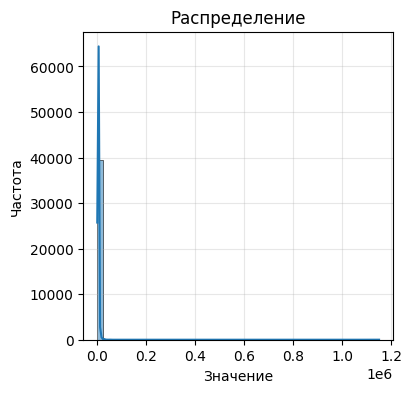

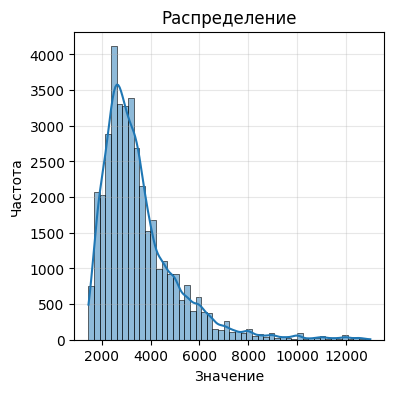

(None, None)

In [10]:
df_copy = df_train.copy()

hist_train_raw = gr.my_histplot(df_copy["price"])
df_copy = dataP.remove_price_outliers(df_copy)
hist_train_clean = gr.my_histplot(df_copy["price"])

hist_train_raw, hist_train_clean

Боксплот тренировочной выборки

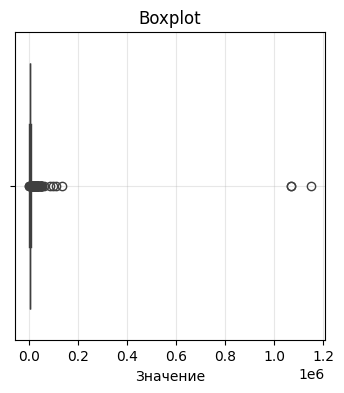

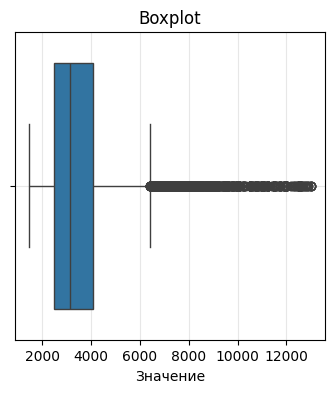

(None, None)

In [11]:
df_copy = df_train.copy()

box_train_raw = gr.my_boxplot(df_copy["price"])
df_copy = dataP.remove_price_outliers(df_copy)
box_train_clean = gr.my_boxplot(df_copy["price"])

box_train_raw, box_train_clean

После того, как проверили на копии выборки - удаляем в оригинале, а также чистим по константам от выбросов валидацию

In [12]:
left_quantile = df_train['price'].quantile(0.01)
right_quantile = df_train['price'].quantile(0.99)  

df_train = dataP.remove_price_outliers(df_train)

mask_val = (df_val['price'] >= left_quantile) & (df_val['price'] <= right_quantile)
df_val = df_val[mask_val].copy()

<h1 style="color: #13907bff;"> Задание №3. Введение в анализ данных. Часть 2.</h1>

<h4 style="color: #7f8c8d;">Разведка</h4>

Посмотрим на столбец 'features'

In [13]:
df_train["features"].isna().sum()

np.int64(0)

In [14]:
df_train["features"]

42827                                                                                                                                                                                                                [Cats Allowed, Dogs Allowed]
55643                                                                                                                                                                                                                                          []
20542                                                                                                                                                                                                       [Doorman, Dogs Allowed, Cats Allowed]
19241     [Swimming Pool, Roof Deck, Dining Room, Doorman, Elevator, Fitness Center, Pre-War, Laundry in Building, Laundry in Unit, High Speed Internet, Dishwasher, Hardwood Floors, Wheelchair Access, No Fee, Outdoor Space, New Construction]
91509                           

In [15]:
df_train["Features_cleaned"] = df_train["features"].apply(dataP.clean_features)
df_val["Features_cleaned"] = df_val["features"].apply(dataP.clean_features)
df_test["Features_cleaned"] = df_test["features"].apply(dataP.clean_features)

In [16]:
df_train[["Features_cleaned", "features"]]

,Features_cleaned,features
42827,"[Cats Allowed, Dogs Allowed]","[Cats Allowed, Dogs Allowed]"
55643,[],[]
20542,"[Doorman, Dogs Allowed, Cats Allowed]","[Doorman, Dogs Allowed, Cats Allowed]"
19241,"[Swimming Pool, Roof Deck, Dining Room, Doorman, Elevator, Fitness Center, Pre-War, Laundry in Building, Laundry in Unit, High Speed Internet, Dishwasher, Hardwood Floors, Wheelchair Access, No Fee, Outdoor Space, New Construction]","[Swimming Pool, Roof Deck, Dining Room, Doorman, Elevator, Fitness Center, Pre-War, Laundry in Building, Laundry in Unit, High Speed Internet, Dishwasher, Hardwood Floors, Wheelchair Access, No Fee, Outdoor Space, New Construction]"
91509,"[Doorman, Fitness Center, No Fee]","[Doorman, Fitness Center, No Fee]"
...,...,...
15846,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, Elevator, Laundry In Building]","[Cats Allowed, Dogs Allowed, No Fee, Doorman, Elevator, Laundry In Building]"
28433,"[Dogs Allowed, Cats Allowed]","[Dogs Allowed, Cats Allowed]"
112530,"[Swimming Pool, Doorman, Elevator, Fitness Center, Laundry in Building, Hardwood Floors, Wheelchair Access]","[Swimming Pool, Doorman, Elevator, Fitness Center, Laundry in Building, Hardwood Floors, Wheelchair Access]"
2123,"[Pre-War, Laundry in Unit, Dishwasher, Hardwood Floors, No Fee, Dogs Allowed, Cats Allowed]","[Pre-War, Laundry in Unit, Dishwasher, Hardwood Floors, No Fee, Dogs Allowed, Cats Allowed]"


In [17]:
df_val[["Features_cleaned", "features"]]

,Features_cleaned,features
78578,"[Prewar, Cats Allowed, Dogs Allowed, Hardwood Floors]","[Prewar, Cats Allowed, Dogs Allowed, Hardwood Floors]"
9964,"[Elevator, Loft]","[Elevator, Loft]"
2470,[Hardwood Floors],[Hardwood Floors]
99560,"[Pre-War, No Fee]","[Pre-War, No Fee]"
32207,"[Doorman, Cats Allowed, Dogs Allowed]","[Doorman, Cats Allowed, Dogs Allowed]"
...,...,...
25339,"[Doorman, Elevator, Laundry in Unit, Dishwasher, Hardwood Floors, No Fee]","[Doorman, Elevator, Laundry in Unit, Dishwasher, Hardwood Floors, No Fee]"
16992,"[Elevator, Loft, Laundry in Building]","[Elevator, Loft, Laundry in Building]"
33049,"[Roof Deck, Doorman, Elevator, Fitness Center, Laundry in Building, Dogs Allowed, Cats Allowed]","[Roof Deck, Doorman, Elevator, Fitness Center, Laundry in Building, Dogs Allowed, Cats Allowed]"
87117,"[Laundry In Unit, Cats Allowed, Dogs Allowed, No Fee, Doorman, Elevator, Fitness Center, Laundry In Building, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors]","[Laundry In Unit, Cats Allowed, Dogs Allowed, No Fee, Doorman, Elevator, Fitness Center, Laundry In Building, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors]"


Теперь подсчитаем, сколько раз каждая фича встречается

In [18]:
all_features = []
for features_list in df_train["Features_cleaned"]:
    all_features.extend(features_list)

In [19]:
feature_counts = Counter(all_features)

for i, (feature, count) in enumerate(feature_counts.most_common(20), 1):
    print(f"{i:2}. {feature:25} : {count}")

 1. Elevator                  : 20317
 2. Cats Allowed              : 18532
 3. Hardwood Floors           : 18477
 4. Dogs Allowed              : 17329
 5. Doorman                   : 16426
 6. Dishwasher                : 16035
 7. No Fee                    : 14234
 8. Laundry in Building       : 12909
 9. Fitness Center            : 10383
10. Pre-War                   : 7223
11. Laundry in Unit           : 6717
12. Roof Deck                 : 5171
13. Outdoor Space             : 4080
14. Dining Room               : 3890
15. High Speed Internet       : 3379
16. Balcony                   : 2279
17. Swimming Pool             : 2140
18. Laundry In Building       : 2070
19. New Construction          : 1994
20. Terrace                   : 1724


<h4 style="color: #7f8c8d;">Обработка</h4>

В датасете возможны опечатки. Приведем все фичи к единообразному виду и посчитаем снова топ-20

In [20]:
normalized_counts = Counter()
for feature, count in feature_counts.items():
    normalized_name = dataP.normalize_feature_name(feature)
    normalized_counts[normalized_name] += count

top_20_normalized = [feature for feature, _ in normalized_counts.most_common(20)]
for i, feature in enumerate(top_20_normalized, 1):
    count = normalized_counts[feature]
    print(f"{i:2}. {feature:25} : {count}")

 1. Elevator                  : 20609
 2. Cats allowed              : 18532
 3. Hardwood floors           : 18504
 4. Dogs allowed              : 17329
 5. Doorman                   : 16640
 6. Dishwasher                : 16356
 7. Laundry in building       : 14985
 8. No fee                    : 14249
 9. Fitness center            : 10387
10. Laundry in unit           : 7269
11. Pre-War                   : 7226
12. Roof deck                 : 5182
13. Outdoor space             : 4082
14. Dining room               : 3902
15. High speed internet       : 3379
16. Balcony                   : 2375
17. Swimming pool             : 2140
18. New construction          : 2032
19. Terrace                   : 1815
20. Exclusive                 : 1667


Как видно выше - топ-20 действительно поменялся!

Теперь добавим топ-20 фичи в наш датасет как бинарные признаки, принимающие значения 0/1

In [21]:
top_20_features = top_20_normalized

for feature in top_20_features:
    df_train[f"{feature}"] = df_train["Features_cleaned"].apply(
        lambda x: 1 if feature in x else 0
    )
    df_val[f"{feature}"] = df_val["Features_cleaned"].apply(
        lambda x: 1 if feature in x else 0
    )
    df_test[f"{feature}"] = df_test["Features_cleaned"].apply(
        lambda x: 1 if feature in x else 0
    )

In [22]:
feature_list = [f"{f}" for f in top_20_features] + ["bathrooms", "bedrooms"]
for i, feat in enumerate(feature_list, 1):
    print(f"{i:2}. {feat}")

 1. Elevator
 2. Cats allowed
 3. Hardwood floors
 4. Dogs allowed
 5. Doorman
 6. Dishwasher
 7. Laundry in building
 8. No fee
 9. Fitness center
10. Laundry in unit
11. Pre-War
12. Roof deck
13. Outdoor space
14. Dining room
15. High speed internet
16. Balcony
17. Swimming pool
18. New construction
19. Terrace
20. Exclusive
21. bathrooms
22. bedrooms


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38684 entries, 42827 to 39699
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            38684 non-null  float64
 1   bedrooms             38684 non-null  int64  
 2   building_id          38684 non-null  object 
 3   created              38684 non-null  object 
 4   description          38684 non-null  object 
 5   display_address      38684 non-null  object 
 6   features             38684 non-null  object 
 7   latitude             38684 non-null  float64
 8   listing_id           38684 non-null  int64  
 9   longitude            38684 non-null  float64
 10  manager_id           38684 non-null  object 
 11  photos               38684 non-null  object 
 12  price                38684 non-null  int64  
 13  street_address       38684 non-null  object 
 14  interest_level       38684 non-null  object 
 15  Features_cleaned     38684 non-null  

In [24]:
df_train["features"].isna().sum()

np.int64(0)

In [25]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9684 entries, 78578 to 105804
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            9684 non-null   float64
 1   bedrooms             9684 non-null   int64  
 2   building_id          9684 non-null   object 
 3   created              9684 non-null   object 
 4   description          9684 non-null   object 
 5   display_address      9684 non-null   object 
 6   features             9684 non-null   object 
 7   latitude             9684 non-null   float64
 8   listing_id           9684 non-null   int64  
 9   longitude            9684 non-null   float64
 10  manager_id           9684 non-null   object 
 11  photos               9684 non-null   object 
 12  price                9684 non-null   int64  
 13  street_address       9684 non-null   object 
 14  interest_level       9684 non-null   object 
 15  Features_cleaned     9684 non-null   

In [26]:
df_val["features"].isna().sum()

np.int64(0)

<h1 style="color: #13907bff;"> Задание №4. Линейная регрессия. Разработка модели.</h1>

<h4 style="color: #7f8c8d;">Что такое детерминированная модель?</h4>

__Детерминированная модель__ — это модель, которая при _одинаковых_ входных данных и гиперпараметрах всегда выдает ___одинаковый результат___. В контексте SGD детерминированность достигается путем фиксации: 

1) начальной инициализации весов (через random_state). 

2) порядка обхода обучающих примеров на каждой эпохе. 

В моей реализации это обеспечено использованием np.random.RandomState(seed + epoch) для генерации воспроизводимых перестановок индексов на каждой итерации.

<h4 style="color: #7f8c8d;">Что такое R-квадрат?</h4>

Коэффициент $R^2$ показывает _долю дисперсии_ целевой переменной, __объясненную моделью__. 

Рассчитывается, как:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

где $SS_{res}$ — _сумма_ квадратов остатков модели, а $SS_{tot}$ — _общая_ дисперсия данных. 

Например, начение $R^2$ = 0.8 означает, что модель ___объясняет 80% вариативности___, что является очень хорошим результатом для задач регрессии. В целом, любой результат выше 0.5 принимается как приемлемый. 

<h4 style="color: #7f8c8d;">Сделать предсказание моделью. Оценить основными метриками: MAE, RMSE, R_squared</h4>

Выделим из тренировочной и валидационной выборки признаки и целевое значение.

In [27]:
X_train = df_train[feature_list]
y_train = df_train["price"]

X_val = df_val[feature_list]
y_val = df_val["price"]

print(f"Обучающая выборка: {X_train.shape}")
print(f"Валидационная выборка: {X_val.shape}")

Обучающая выборка: (38684, 22)
Валидационная выборка: (9684, 22)


Обучаем аналитическое решение

In [28]:
model_analytical = linreg.LinearRegression(method="analytical", random_state=42)

start_time = time.time()
model_analytical.fit(X_train.values, y_train.values)
end_time = time.time()
print(f"Аналитическая модель обучена за {end_time - start_time:.2f} сек")

Аналитическая модель обучена за 0.97 сек


Обучаем стохастический градиентный спуск

In [29]:
gs = UniversalGridSearch(
    evaluate_func=dataP.evaluate_model,
    results_file='all_grid_results.csv'
)

X_train_raw = X_train.values 
X_val_raw = X_val.values
y_train_raw = y_train.values
y_val_raw = y_val.values

print(f"GridSearch готов")
print(f"X_train: {X_train_raw.shape}, y_train: {y_train_raw.shape}")
print(f"X_val: {X_val_raw.shape}, y_val: {y_val_raw.shape}")

GridSearch готов
X_train: (38684, 22), y_train: (38684,)
X_val: (9684, 22), y_val: (9684,)


In [30]:
'''#Перебор параметров для SGD

sgd_results = gs.run_grid(
    model_class=linreg.LinearRegression,
    model_name='SGD',
    param_grid={
        'method': ['sgd'],
        'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 5000, 10000]
    },
    scalers=[
        ('NoScaler', X_train_raw, X_val_raw),
    ],
    early_stopping={'patience': 15, 'min_delta': 1e-4},
    X_train=X_train_raw, y_train=y_train_raw,
    X_val=X_val_raw, y_val=y_val_raw,
    verbose=True
)'''

"#Перебор параметров для SGD\n\nsgd_results = gs.run_grid(\n    model_class=linreg.LinearRegression,\n    model_name='SGD',\n    param_grid={\n        'method': ['sgd'],\n        'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 5000, 10000]\n    },\n    scalers=[\n        ('NoScaler', X_train_raw, X_val_raw),\n    ],\n    early_stopping={'patience': 15, 'min_delta': 1e-4},\n    X_train=X_train_raw, y_train=y_train_raw,\n    X_val=X_val_raw, y_val=y_val_raw,\n    verbose=True\n)"

In [31]:
model_sgd = linreg.LinearRegression(method="sgd", 
                                    learning_rate= 0.0005 , 
                                    n_iterations=14, 
                                    random_state=42
                                    )

start_time = time.time()
model_sgd.fit(X_train.values, y_train.values)
end_time = time.time()

print(f"СГД модель обучена за {end_time - start_time:.2f} сек")

СГД модель обучена за 15.03 сек


Вычисляем предсказание на тестовых и валидационных данных для аналитического решения и стохастического градиентного спуска.

In [32]:
y_train_pred_analytical = model_analytical.predict(X_train.values)
y_val_pred_analytical = model_analytical.predict(X_val.values)

y_train_pred_sgd = model_sgd.predict(X_train.values)
y_val_pred_sgd = model_sgd.predict(X_val.values)

<h4 style="color: #7f8c8d;">Метрики</h4>


Вычисление метрик на тренировочных данных для аналитического решения и градиентного спуска

In [33]:
# Метрики аналитического решения
mae_train_analytical = mean_absolute_error(y_train, y_train_pred_analytical)
rmse_train_analytical = np.sqrt(mean_squared_error(y_train, y_train_pred_analytical))
r2_train_analytical = model_analytical.rscore(X_train.values, y_train.values)

mae_val_analytical = mean_absolute_error(y_val, y_val_pred_analytical)
rmse_val_analytical = np.sqrt(mean_squared_error(y_val, y_val_pred_analytical))
r2_val_analytical = model_analytical.rscore(X_val.values, y_val.values)

# Метрики градиентного спуска
mae_train_sgd = mean_absolute_error(y_train, y_train_pred_sgd)
rmse_train_sgd = np.sqrt(mean_squared_error(y_train, y_train_pred_sgd))
r2_train_sgd = model_sgd.rscore(X_train.values, y_train.values)

mae_val_sgd = mean_absolute_error(y_val, y_val_pred_sgd)
rmse_val_sgd = np.sqrt(mean_squared_error(y_val, y_val_pred_sgd))
r2_val_sgd = model_sgd.rscore(X_val.values, y_val.values)


Вычисление метрик на валидационных данных для аналитического решения и градиентного спуска

In [34]:
mae_table = pd.DataFrame(
    {
        "model": ["Linear Regression (Analytical)", "Linear Regression (SGD)"],
        "train": [mae_train_analytical, mae_train_sgd],
        "test": [mae_val_analytical, mae_val_sgd],
    }
)

rmse_table = pd.DataFrame(
    {
        "model": ["Linear Regression (Analytical)", "Linear Regression (SGD)"],
        "train": [rmse_train_analytical, rmse_train_sgd],
        "test": [rmse_val_analytical, rmse_val_sgd],
    }
)

r2_table = pd.DataFrame(
    {
        "model": ["Linear Regression (Analytical)", "Linear Regression (SGD)"],
        "train": [r2_train_analytical, r2_train_sgd],
        "test": [r2_val_analytical, r2_val_sgd],
    }
)

<h4 style="color: #7f8c8d;">Обучим линейную регрессию из библиотеки Sklearn, сравним по метрикам с нашей реализацией.</h4>

In [35]:
from sklearn.linear_model import LinearRegression as SkLinearRegression

sk_linreg = SkLinearRegression()

start_time = time.time()
sk_linreg.fit(X_train, y_train)
end_time = time.time()

print(f"Склёрн Линейная Регрессия обучена за {end_time - start_time:.2f} сек")

Склёрн Линейная Регрессия обучена за 0.30 сек


In [36]:
y_train_pred_sk = sk_linreg.predict(X_train)
y_val_pred_sk = sk_linreg.predict(X_val)

Посчитаем метрики на тренировочных и валидационных данных

In [37]:
mae_train_sk = mean_absolute_error(y_train, y_train_pred_sk)
rmse_train_sk = np.sqrt(mean_squared_error(y_train, y_train_pred_sk))
r2_train_sk = r2_score(y_train, y_train_pred_sk)

mae_val_sk = mean_absolute_error(y_val, y_val_pred_sk)
rmse_val_sk = np.sqrt(mean_squared_error(y_val, y_val_pred_sk))
r2_val_sk = r2_score(y_val, y_val_pred_sk)

Добавим значения в таблицу

In [38]:
mae_table.loc[len(mae_table)] = ["Sklearn Linear Regression", 
                                 mae_train_sk, 
                                 mae_val_sk
                                 ]

rmse_table.loc[len(rmse_table)] = ["Sklearn Linear Regression",
                                   rmse_train_sk,
                                   rmse_val_sk,
                                   ]

r2_table.loc[len(r2_table)] = ["Sklearn Linear Regression", 
                               r2_train_sk, 
                               r2_val_sk
                               ]

In [39]:
metrics_dict = {
    "model": mae_table["model"],
    "mae_train": mae_table["train"],
    "mae_val": mae_table["test"],
    "rmse_train": rmse_table["train"],
    "rmse_val": rmse_table["test"],
    "r2_train": r2_table["train"],
    "r2_val": r2_table["test"],
}

summary_base_df = pd.DataFrame(metrics_dict)
summary_base_df

,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val
0,Linear Regression (Analytical),732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175
1,Linear Regression (SGD),731.356035,730.119882,1056.681780,1060.074418,0.555441,0.561668
2,Sklearn Linear Regression,732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175


Аналитическая реализация линейной регрессии показывает результаты, идентичные sklearn, что подтверждает правильность кастомной реализации. SGD-версия уступает по $R^2$, но немного опережает по $MAE$ - это ожидаемо для SGD из-за случайной природы и ранней остановки, которые могут привести к неоптимальному, но более близкому решению. Все модели минимально отличаются по train и val, что говорит об отсутствии переобучения и стабильности решений.

<h1 style="color: #13907bff;"> Задание №5. Внедрение методов регуляризации - Lasso, Ridge, ElasticNet.</h1>

In [40]:
from sklearn.linear_model import Ridge as SklearnRidge
from sklearn.linear_model import Lasso as SklearnLasso
from sklearn.linear_model import ElasticNet as SklearnElasticNet

import my_LinearRegression as linreg

<h4 style="color: #7f8c8d;">Обучение моделей и сравнение метрик.</h4>

Отдельно реализовал функцию evaluate_model, которая считает метрики моделей. 

In [41]:
'''ridge_results = gs.run_grid(
    model_class=linreg.RidgeRegression,
    model_name='Ridge_NoNorm',
    param_grid={
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'method': ['gd'],
        'learning_rate': [0.001, 0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('NoScaler', X_train_raw, X_val_raw),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_raw, y_train=y_train_raw,
    X_val=X_val_raw, y_val=y_val_raw,
    verbose=True
)

lasso_results = gs.run_grid(
    model_class=linreg.LassoRegression,
    model_name='Lasso_NoNorm',
    param_grid={
        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('NoScaler', X_train_raw, X_val_raw),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_raw, y_train=y_train_raw,
    X_val=X_val_raw, y_val=y_val_raw,
    verbose=True
)

elastic_results = gs.run_grid(
    model_class=linreg.ElasticNetRegression,
    model_name='ElasticNet_NoNorm',
    param_grid={
        'alpha': [0.001, 0.01, 0.1],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000]
    },
    scalers=[
        ('NoScaler', X_train_raw, X_val_raw),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_raw, y_train=y_train_raw,
    X_val=X_val_raw, y_val=y_val_raw,
    verbose=True
)'''

"ridge_results = gs.run_grid(\n    model_class=linreg.RidgeRegression,\n    model_name='Ridge_NoNorm',\n    param_grid={\n        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],\n        'method': ['gd'],\n        'learning_rate': [0.001, 0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('NoScaler', X_train_raw, X_val_raw),\n    ],\n    early_stopping={'patience': 15},\n    X_train=X_train_raw, y_train=y_train_raw,\n    X_val=X_val_raw, y_val=y_val_raw,\n    verbose=True\n)\n\nlasso_results = gs.run_grid(\n    model_class=linreg.LassoRegression,\n    model_name='Lasso_NoNorm',\n    param_grid={\n        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],\n        'method': ['gd'],\n        'learning_rate': [0.01, 0.05, 0.1, 0.2],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('NoScaler', X_train_raw, X_val_raw),\n    ],\n    early_stopping={'patience': 15},\n    X_train=X_train_raw, y_train=y_train_raw,\n    X_val=X_val

In [42]:
results = []

# Ridge Custom
results.append(
    dataP.evaluate_model(
        linreg.RidgeRegression(
            alpha=0.001,
            method="gd",
            learning_rate=0.1,
            n_iterations=3000,
            random_state=42,
        ),
        X_train,
        y_train,
        X_val,
        y_val,
        "Ridge Custom",
    )
)

# Lasso Custom
results.append(
    dataP.evaluate_model(
        linreg.LassoRegression(
            alpha=0.001,
            method="gd",
            learning_rate=0.1,
            n_iterations=3000,
            random_state=42,
        ),
        X_train,
        y_train,
        X_val,
        y_val,
        "Lasso Custom",
    )
)

# ElasticNet Custom
results.append(
    dataP.evaluate_model(
        linreg.ElasticNetRegression(
            alpha=0.001,
            l1_ratio=0.9,
            method="gd",
            learning_rate=0.1,
            n_iterations=2000,
            random_state=42,
        ),
        X_train,
        y_train,
        X_val,
        y_val,
        "ElasticNet Custom",
    )
)

In [43]:
# SkLearn Ridge
results.append(
    dataP.evaluate_model(
        SklearnRidge(alpha=1.0, random_state=42),
        X_train,
        y_train,
        X_val,
        y_val,
        "SkLearn Ridge",
    )
)

# SkLearn Lasso
results.append(
    dataP.evaluate_model(
        SklearnLasso(alpha=0.1, random_state=42),
        X_train,
        y_train,
        X_val,
        y_val,
        "SkLearn Lasso",
    )
)

# SkLearn ElasticNet
results.append(
    dataP.evaluate_model(
        SklearnElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        X_train,
        y_train,
        X_val,
        y_val,
        "SkLearn ElasticNet",
    )
)

In [44]:
summary_regularized_df = pd.DataFrame(results)
summary_regularized_df

,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
0,Ridge Custom,733.072482,731.844208,1056.474212,1059.708381,0.555616,0.561971,26.656473
1,Lasso Custom,733.115787,731.855513,1056.425899,1059.621362,0.555657,0.562043,26.866613
2,ElasticNet Custom,733.141141,731.898269,1056.478790,1059.689037,0.555612,0.561987,14.169861
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505
4,SkLearn Lasso,733.031893,731.698361,1056.288482,1059.416617,0.555772,0.562212,0.211168
5,SkLearn ElasticNet,737.449842,737.134195,1068.222551,1073.054502,0.545678,0.550868,0.825636


Sklearn-реализации Ridge и Lasso показывают наилучшее качество и обучаются в разы быстрее кастомных версий, что ожидаемо благодаря оптимизированным решателям на C++. Кастомные модели Lasso и ElasticNet демонстрируют практически идентичное качество метрик, что подтверждает корректность реализации алгоритмов градиентного спуска. Sklearn ElasticNet заметно отстаёт, что может быть связано с неудачным подбором гиперпараметров по умолчанию.

In [45]:
model_customreg_top1 = linreg.LassoRegression(  alpha=0.001,
                                                method="gd",
                                                learning_rate=0.1,
                                                n_iterations=3000,
                                                random_state=42,
)
model_customreg_top1.fit(X_train, y_train)

<h1 style="color: #13907bff;"> Задание №6. Нормализация признаков.</h1>

<h4 style="color: #7f8c8d;">Нормализация признаков: обязательность и исключения.</h4>

__Нормализация признаков__ является критически важным этапом предобработки данных для алгоритмов, 
основанных на _градиентных методах_ оптимизации или _вычислении евклидовых расстояний_. 
Признаки с разным масштабом приводят к ___доминированию___ одних переменных над другими, 
__искажая__ _loss-функцию_ и __замедляя__ _сходимость_. 

В методах с регуляризацией нормализация 
становится обязательной, поскольку штраф за величину весов применяется одинаково ко всем 
признакам __независимо от их исходного масштаба__.

Однако существуют классы алгоритмов, ___инвариантных___ к масштабу признаков. 
Древовидные модели, вероятностные методы и некоторые аналитические решения 
не используют расстояния или градиентные спуски, поэтому нормализация для них 
__не требуется__, а в некоторых случаях может даже _ухудшить_ интерпретируемость модели.

In [46]:
table = dataP.norm_table()
table

,Метод ML,Нужна нормализация?,Обоснование
0,Линейная регрессия (GD/SGD),ДА,Разный масштаб → зигзаги → медленная сходимость
1,Линейная регрессия (аналитика),НЕТ,Веса автоматически масштабируются обратно пропорционально
2,Ridge/Lasso/ElasticNet (GD),ДА,"Регуляризация штрафует веса одинаково, масштаб критичен"
3,Ridge (аналитика),НЕТ,Аналитическое решение подстраивает веса под масштаб
4,Логистическая регрессия,ДА,Градиентный спуск + регуляризация
5,"SVM (RBF, полиномиальное)",ДА,Чувствителен к евклидовым расстояниям
6,SVM (линейное ядро),Желательно,"Без регуляризации можно без, с регуляризацией — обязательно"
7,"KNN, K-Means",ДА,Евклидово расстояние — признаки с большим масштабом доминируют
8,"PCA, SVD",ДА,Чувствителен к дисперсии признаков
9,Нейронные сети,ДА,"Насыщение активаций, ускорение сходимости"


Формула для MinMaxScaler:

$$
X_{scaled} = \frac{(X - X_{min})}{(X_{max} - X_{min})}
$$

Где:

$X_{min}$ - минимальное значение признака

$X_{max}$ - максимальное значение признака

$X_{scaled}$ - результат в диапазоне [0, 1]

In [47]:
from sklearn.preprocessing import MinMaxScaler as SkMinMax
from sklearn.preprocessing import StandardScaler as SkStandard

<h4 style="color: #7f8c8d;">CustomMinMaxScaler VS SkLearn MinMaxScaler</h4>

Сначала применим MinMaxScaler - кастомный и из библиотеки SkLearn

In [48]:
custom_mms = my_Scalers.CustomMinMaxScaler()
X_train_mms_custom = custom_mms.fit_transform(X_train[feature_list])
X_val_mms_custom = custom_mms.transform(X_val[feature_list])

sklearn_mms = SkMinMax()
X_train_mms_sklearn = sklearn_mms.fit_transform(X_train[feature_list])
X_val_mms_sklearn = sklearn_mms.transform(X_val[feature_list])

На всякий случай проверим датафреймы целиком с помощью метода np.allclose из библиотеки NumPy 

In [49]:
minmax_identity_df = pd.DataFrame(
    {
        "Датасет": ["Обучающая выборка", "Тестовая выборка"],
        "Custom vs Sklearn": [
            (
                "Идентичны"
                if np.allclose(X_train_mms_custom, X_train_mms_sklearn)
                else "Различаются"
            ),
            (
                "Идентичны"
                if np.allclose(X_val_mms_custom, X_val_mms_sklearn)
                else "Различаются"
            ),
        ],
        "Макс. разница": [
            f"{np.max(np.abs(X_train_mms_custom - X_train_mms_sklearn)):.2e}",
            f"{np.max(np.abs(X_val_mms_custom - X_val_mms_sklearn)):.2e}",
        ],
    }
)

minmax_identity_df

,Датасет,Custom vs Sklearn,Макс. разница
0,Обучающая выборка,Идентичны,5.55e-17
1,Тестовая выборка,Идентичны,5.55e-17


<h4 style="color: #7f8c8d;">CustomStandardScaler VS SkLearn StandardScaler</h4>

Аналогично применим кастомный и библиотечный StandardScaler

In [50]:
custom_ss = my_Scalers.CustomStandardScaler()
X_train_ss_custom = custom_ss.fit_transform(X_train[feature_list])
X_val_ss_custom = custom_ss.transform(X_val[feature_list])


sklearn_ss = SkStandard()
X_train_ss_sklearn = sklearn_ss.fit_transform(X_train[feature_list])
X_val_ss_sklearn = sklearn_ss.transform(X_val[feature_list])

In [51]:
std_identity_df = pd.DataFrame(
    {
        "Датасет": ["Обучающая выборка", "Тестовая выборка"],
        "Custom vs Sklearn": [
            (
                "Идентичны"
                if np.allclose(X_train_ss_custom, X_train_ss_sklearn)
                else "Различаются"
            ),
            (
                "Идентичны"
                if np.allclose(X_val_ss_custom, X_val_ss_sklearn)
                else "Различаются"
            ),
        ],
        "Макс. разница": [
            f"{np.max(np.abs(X_train_ss_custom - X_train_ss_sklearn)):.2e}",
            f"{np.max(np.abs(X_val_ss_custom - X_val_ss_sklearn)):.2e}",
        ],
    }
)

std_identity_df

,Датасет,Custom vs Sklearn,Макс. разница
0,Обучающая выборка,Идентичны,0.00e+00
1,Тестовая выборка,Идентичны,0.00e+00


<h1 style="color: #13907bff;"> Задание №7. Обучение моделей на нормализованных признаках. Сравнение.</h1>

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

<h4 style="color: #7f8c8d;">Обучение моделей и их сравнение</h4>

Кастомные модели + MinMaxScaler

In [53]:
'''ridge_mms_custom_results = gs.run_grid(
    model_class=linreg.RidgeRegression,
    model_name='Ridge_MinMax_custom',
    param_grid={
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('MinMax_custom', X_train_mms_custom, X_val_mms_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_mms_custom, y_train=y_train_raw,
    X_val=X_val_mms_custom, y_val=y_val_raw,
    verbose=True
)

lasso_mms_custom_results = gs.run_grid(
    model_class=linreg.LassoRegression,
    model_name='Lasso_MinMax_custom',
    param_grid={
        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('MinMax_custom', X_train_mms_custom, X_val_mms_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_mms_custom, y_train=y_train_raw,
    X_val=X_val_mms_custom, y_val=y_val_raw,
    verbose=True
)

elastic_mms_custom_results = gs.run_grid(
    model_class=linreg.ElasticNetRegression,
    model_name='ElasticNet_MinMax_custom',
    param_grid={
        'alpha': [0.001, 0.01, 0.1],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000]
    },
    scalers=[
        ('MinMax_custom', X_train_mms_custom, X_val_mms_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_mms_custom, y_train=y_train_raw,
    X_val=X_val_mms_custom, y_val=y_val_raw,
    verbose=True
)'''

"ridge_mms_custom_results = gs.run_grid(\n    model_class=linreg.RidgeRegression,\n    model_name='Ridge_MinMax_custom',\n    param_grid={\n        'alpha': [0.001, 0.01, 0.1, 1.0],\n        'method': ['gd'],\n        'learning_rate': [0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('MinMax_custom', X_train_mms_custom, X_val_mms_custom),\n    ],\n    early_stopping={'patience': 15},\n    X_train=X_train_mms_custom, y_train=y_train_raw,\n    X_val=X_val_mms_custom, y_val=y_val_raw,\n    verbose=True\n)\n\nlasso_mms_custom_results = gs.run_grid(\n    model_class=linreg.LassoRegression,\n    model_name='Lasso_MinMax_custom',\n    param_grid={\n        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],\n        'method': ['gd'],\n        'learning_rate': [0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('MinMax_custom', X_train_mms_custom, X_val_mms_custom),\n    ],\n    early_stopping={'patience': 15},\n  

In [54]:
# LinearRegression Custom
results.append(
    dataP.evaluate_model(
        linreg.LinearRegression(
            method="gd", 
            random_state=42
        ),
        X_train_mms_custom,
        y_train,
        X_val_mms_custom,
        y_val,
        "LinearRegression Custom (MinMax)",
    )
)


# Ridge Custom
results.append(
    dataP.evaluate_model(
        linreg.RidgeRegression(
            alpha=0.001,
            learning_rate=0.1,
            n_iterations=3000,
            method="gd",
            random_state=42,
        ),
        X_train_mms_custom,
        y_train,
        X_val_mms_custom,
        y_val,
        "Ridge Custom (MinMax)",
    )
)

# Lasso Custom
results.append(
    dataP.evaluate_model(
        linreg.LassoRegression(
            alpha=0.001,
            method="gd",
            n_iterations=3000,
            learning_rate=0.1,
            random_state=42,
        ),
        X_train_mms_custom,
        y_train,
        X_val_mms_custom,
        y_val,
        "Lasso Custom (MinMax)",
    )
)

# ElasticNet Custom
results.append(
    dataP.evaluate_model(
        linreg.ElasticNetRegression(
            alpha=0.001,
            method="gd",
            n_iterations=2000,
            learning_rate=0.1,
            l1_ratio=0.9,
            random_state=42,
        ),
        X_train_mms_custom,
        y_train,
        X_val_mms_custom,
        y_val,
        "ElasticNet Custom (MinMax)",
    )
)

SkLearn модели + MinMaxScaler

In [55]:
# LinearRegression Sklearn
results.append(
    dataP.evaluate_model(
        LinearRegression(),
        X_train_mms_sklearn,
        y_train,
        X_val_mms_sklearn,
        y_val,
        "LinearRegression Sklearn (MinMax)",
    )
)

# Ridge Sklearn
results.append(
    dataP.evaluate_model(
        Ridge(alpha=1.0, random_state=42),
        X_train_mms_sklearn,
        y_train,
        X_val_mms_sklearn,
        y_val,
        "Ridge Sklearn (MinMax)",
    )
)

# Lasso Sklearn
results.append(
    dataP.evaluate_model(
        Lasso(alpha=0.1, random_state=42),
        X_train_mms_sklearn,
        y_train,
        X_val_mms_sklearn,
        y_val,
        "Lasso Sklearn (MinMax)",
    )
)

# ElasticNet Sklearn
results.append(
    dataP.evaluate_model(
        ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        X_train_mms_sklearn,
        y_train,
        X_val_mms_sklearn,
        y_val,
        "ElasticNet Sklearn (MinMax)",
    )
)

Кастомные модели + StandardScaler

In [56]:
'''ridge_ss_custom_results = gs.run_grid(
    model_class=linreg.RidgeRegression,
    model_name='Ridge_Standard_custom',
    param_grid={
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('Standard_custom', X_train_ss_custom, X_val_ss_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_ss_custom, y_train=y_train_raw,
    X_val=X_val_ss_custom, y_val=y_val_raw,
    verbose=True
)

lasso_ss_custom_results = gs.run_grid(
    model_class=linreg.LassoRegression,
    model_name='Lasso_Standard_custom',
    param_grid={
        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000, 3000]
    },
    scalers=[
        ('Standard_custom', X_train_ss_custom, X_val_ss_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_ss_custom, y_train=y_train_raw,
    X_val=X_val_ss_custom, y_val=y_val_raw,
    verbose=True
)

elastic_ss_custom_results = gs.run_grid(
    model_class=linreg.ElasticNetRegression,
    model_name='ElasticNet_Standard_custom',
    param_grid={
        'alpha': [0.001, 0.01, 0.1],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'method': ['gd'],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_iterations': [1000, 2000]
    },
    scalers=[
        ('Standard_custom', X_train_ss_custom, X_val_ss_custom),
    ],
    early_stopping={'patience': 15},
    X_train=X_train_ss_custom, y_train=y_train_raw,
    X_val=X_val_ss_custom, y_val=y_val_raw,
    verbose=True
)'''

"ridge_ss_custom_results = gs.run_grid(\n    model_class=linreg.RidgeRegression,\n    model_name='Ridge_Standard_custom',\n    param_grid={\n        'alpha': [0.001, 0.01, 0.1, 1.0],\n        'method': ['gd'],\n        'learning_rate': [0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('Standard_custom', X_train_ss_custom, X_val_ss_custom),\n    ],\n    early_stopping={'patience': 15},\n    X_train=X_train_ss_custom, y_train=y_train_raw,\n    X_val=X_val_ss_custom, y_val=y_val_raw,\n    verbose=True\n)\n\nlasso_ss_custom_results = gs.run_grid(\n    model_class=linreg.LassoRegression,\n    model_name='Lasso_Standard_custom',\n    param_grid={\n        'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],\n        'method': ['gd'],\n        'learning_rate': [0.01, 0.05, 0.1],\n        'n_iterations': [1000, 2000, 3000]\n    },\n    scalers=[\n        ('Standard_custom', X_train_ss_custom, X_val_ss_custom),\n    ],\n    early_stopping={'patience': 15},\n  

In [57]:
# LinearRegression Custom
results.append(
    dataP.evaluate_model(
        linreg.LinearRegression(
            method="gd", 
            random_state=42
        ),
        X_train_ss_custom,
        y_train,
        X_val_ss_custom,
        y_val,
        "LinearRegression Custom (Standard)",
    )
)

# Ridge Custom
results.append(
    dataP.evaluate_model(
        linreg.RidgeRegression(
            alpha=0.001,
            learning_rate=0.01,
            n_iterations=1000,
            method="gd",
            random_state=42,
        ),
        X_train_ss_custom,
        y_train,
        X_val_ss_custom,
        y_val,
        "Ridge Custom (Standard)",
    )
)

# Lasso Custom
results.append(
    dataP.evaluate_model(
        linreg.LassoRegression(
            alpha=0.1,
            method="gd",
            n_iterations=1000,
            learning_rate=0.01,
            random_state=42,
        ),
        X_train_ss_custom,
        y_train,
        X_val_ss_custom,
        y_val,
        "Lasso Custom (Standard)",
    )
)

# ElasticNet Custom
results.append(
    dataP.evaluate_model(
        linreg.ElasticNetRegression(
            alpha=0.001,
            method="gd",
            n_iterations=1000,
            learning_rate=0.01,
            l1_ratio=0.9,
            random_state=42,
        ),
        X_train_ss_custom,
        y_train,
        X_val_ss_custom,
        y_val,
        "ElasticNet Custom (Standard)",
    )
)

SkLearn модели + StandardScaler

In [58]:
# LinearRegression Sklearn
results.append(
    dataP.evaluate_model(
        LinearRegression(),
        X_train_ss_sklearn,
        y_train,
        X_val_ss_sklearn,
        y_val,
        "LinearRegression Sklearn (Standard)",
    )
)

# Ridge Sklearn
results.append(
    dataP.evaluate_model(
        Ridge(alpha=1.0, random_state=42),
        X_train_ss_sklearn,
        y_train,
        X_val_ss_sklearn,
        y_val,
        "Ridge Sklearn (Standard)",
    )
)

# Lasso Sklearn
results.append(
    dataP.evaluate_model(
        Lasso(alpha=0.1, random_state=42),
        X_train_ss_sklearn,
        y_train,
        X_val_ss_sklearn,
        y_val,
        "Lasso Sklearn (Standard)",
    )
)

# ElasticNet Sklearn
results.append(
    dataP.evaluate_model(
        ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        X_train_ss_sklearn,
        y_train,
        X_val_ss_sklearn,
        y_val,
        "ElasticNet Sklearn (Standard)",
    )
)

Выведем обновленную таблицу с результатами 

In [59]:
summary_normalized_df = pd.DataFrame(results)
summary_normalized_df

,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
0,Ridge Custom,733.072482,731.844208,1056.474212,1059.708381,0.555616,0.561971,26.656473
1,Lasso Custom,733.115787,731.855513,1056.425899,1059.621362,0.555657,0.562043,26.866613
2,ElasticNet Custom,733.141141,731.898269,1056.478790,1059.689037,0.555612,0.561987,14.169861
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505
4,SkLearn Lasso,733.031893,731.698361,1056.288482,1059.416617,0.555772,0.562212,0.211168
5,SkLearn ElasticNet,737.449842,737.134195,1068.222551,1073.054502,0.545678,0.550868,0.825636
6,LinearRegression Custom (MinMax),916.412227,922.736545,1318.588873,1330.168075,0.307756,0.309850,9.942229
7,Ridge Custom (MinMax),760.792233,762.275997,1104.592477,1111.355874,0.514214,0.518234,17.969819
8,Lasso Custom (MinMax),750.094465,751.107835,1085.271836,1090.597816,0.531060,0.536063,20.335993
9,ElasticNet Custom (MinMax),763.410489,764.789245,1107.457665,1113.773062,0.511691,0.516136,11.858923


Разобъем таблицу на смысловые блоки и отсортируем по R2

In [60]:
blocks = {
    "БЕЗ НОРМАЛИЗАЦИИ": summary_normalized_df[~summary_normalized_df["model"].str
                                                                             .contains("MinMax|Standard")]
                                                                             .sort_values("r2_val", ascending=False),

    "MINMAX SCALER": summary_normalized_df[summary_normalized_df["model"].str
                                                                         .contains("MinMax")]
                                                                         .sort_values("r2_val", ascending=False),

    "STANDARD SCALER": summary_normalized_df[summary_normalized_df["model"].str
                                                                           .contains("Standard")]
                                                                           .sort_values("r2_val", ascending=False),
}

df_scaled_vs_nonscaled = pd.concat(blocks)
df_scaled_vs_nonscaled

model   mae_train     mae_val   rmse_train     rmse_val  r2_train    r2_val   fit_time
БЕЗ НОРМАЛИЗАЦИИ 3                         SkLearn Ridge  733.006679  731.722173  1056.188259  1059.407612  0.555856  0.562220   0.135505
                 4                         SkLearn Lasso  733.031893  731.698361  1056.288482  1059.416617  0.555772  0.562212   0.211168
                 1                          Lasso Custom  733.115787  731.855513  1056.425899  1059.621362  0.555657  0.562043  26.866613
                 2                     ElasticNet Custom  733.141141  731.898269  1056.478790  1059.689037  0.555612  0.561987  14.169861
                 0                          Ridge Custom  733.072482  731.844208  1056.474212  1059.708381  0.555616  0.561971  26.656473
                 5                    SkLearn ElasticNet  737.449842  737.134195  1068.222551  1073.054502  0.545678  0.550868   0.825636
MINMAX SCALER    12               Lasso Sklearn (MinMax)  733.041960  731.731892  1056.290935  1059.445421  0.555770  0.562188   1.045315
                 10    LinearRegression Sklearn (MinMax)  732.956152  731.822448  1056.161178  1059.461681  0.555879  0.562175   0.339054
                 11               Ridge Sklearn (MinMax)  733.039740  731.849760  1056.241450  1059.551625  0.555812  0.562100   0.215444
                 8                 Lasso Custom (MinMax)  750.094465  751.107835  1085.271836  1090.597816  0.531060  0.536063  20.335993
                 7                 Ridge Custom (MinMax)  760.792233  762.275997  1104.592477  1111.355874  0.514214  0.518234  17.969819
                 9            ElasticNet Custom (MinMax)  763.410489  764.789245  1107.457665  1113.773062  0.511691  0.516136  11.858923
                 6      LinearRegression Custom (MinMax)  916.412227  922.736545  1318.588873  1330.168075  0.307756  0.309850   9.942229
                 13          ElasticNet Sklearn (MinMax)  949.271076  955.366821  1361.238145  1373.124579  0.262251  0.264555   0.185492
STANDARD SCALER  16              Lasso Custom (Standard)  732.951385  731.808567  1056.161234  1059.457760  0.555879  0.562178   7.235136
                 14   LinearRegression Custom (Standard)  732.955101  731.815160  1056.161191  1059.458026  0.555879  0.562178  18.055030
                 17         ElasticNet Custom (Standard)  732.954227  731.814498  1056.161196  1059.459074  0.555879  0.562177   6.068035
                 20             Lasso Sklearn (Standard)  732.948778  731.808674  1056.161281  1059.460728  0.555879  0.562176   0.433249
                 18  LinearRegression Sklearn (Standard)  732.956152  731.822448  1056.161178  1059.461681  0.555879  0.562175   0.163221
                 19             Ridge Sklearn (Standard)  732.955922  731.822287  1056.161178  1059.461949  0.555879  0.562175   0.034362
                 15              Ridge Custom (Standard)  732.946985  731.809325  1056.161548  1059.468841  0.555879  0.562169   4.392517
                 21        ElasticNet Sklearn (Standard)  733.138812  732.108514  1056.929781  1060.751986  0.555233  0.561108   0.163930

Кастомные Ridge, Lasso и ElasticNet без нормализации показывают качество, незначительно уступающее sklearn, что подтверждает корректность реализаций. MinMaxScaler для кастомных моделей не подходит, тогда как sklearn-модели с ним работают отлично — это объясняется чувствительностью градиентного спуска к искажению структуры данных при сжатии в отрезок [0,1]. StandardScaler, оказался лучшим выбором: кастомные модели достигают R²=0,56218, практически не уступая лидеру, поскольку нормализация приводит признаки к единому масштабу, важному для сходимости градиентного спуска. 

Победа StandardScaler над MinMaxScaler говорит о том, что данные имеют распределение, близкое к нормальному, не содержат значительных выбросов и включают как бинарные, так и непрерывные признаки, для которых сохранение статистических моментов(среднее, дисперсия) важнее приведения к единому диапазону.

In [61]:
model_sklern_lasso_minmax = Lasso(  alpha=0.1, 
                                    random_state=42
)
model_sklern_lasso_minmax.fit(X_train, y_train)

model_custom_lasso_std = linreg.LassoRegression(alpha=0.1,
                                                method="gd",
                                                n_iterations=1000,
                                                learning_rate=0.01,
                                                random_state=42
)
model_custom_lasso_std.fit(X_train, y_train)

<h1 style="color: #13907bff;"> Задание №8. Переобучение модели.</h1>

<h4 style="color: #7f8c8d;">Подготовка данных.</h4>

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [63]:
feature_list_poly = ["bathrooms", "bedrooms"]
X_poly_raw = df_train[feature_list_poly]
y_poly_raw = df_train["price"]

X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(
    X_poly_raw, y_poly_raw, test_size=0.2, random_state=42
)

target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train_poly.values.reshape(-1, 1)).ravel()
y_val_scaled = target_scaler.transform(y_val_poly.values.reshape(-1, 1)).ravel()

poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly_10 = poly.fit_transform(X_train_poly)
X_val_poly_10 = poly.transform(X_val_poly)

feature_names = poly.get_feature_names_out(feature_list_poly)

In [64]:
poly_results_final = []
predictions = []

res = dataP.train_and_predict(
    LinearRegression(), X_train_poly_10, y_train_scaled, X_val_poly_10
)
predictions.append({"model": "LinearRegression degree=10", **res})

In [65]:
for alpha in [0.1, 1.0, 10.0, 100.0]:
    res = dataP.train_and_predict(
        Ridge(alpha=alpha, random_state=42),
        X_train_poly_10,
        y_train_scaled,
        X_val_poly_10,
    )
    predictions.append({"model": f"Ridge degree=10 alpha={alpha}", **res})

for alpha in [0.1, 1.0, 10.0, 100.0]:
    res = dataP.train_and_predict(
        make_pipeline(StandardScaler(), Ridge(alpha=alpha, random_state=42)),
        X_train_poly_10,
        y_train_scaled,
        X_val_poly_10,
    )
    predictions.append({"model": f"Ridge+Scaler degree=10 alpha={alpha}", **res})

/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.37342e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [66]:
for alpha in [0.0001, 0.001, 0.01, 0.1]:
    res = dataP.train_and_predict(
        Lasso(alpha=alpha, random_state=42),
        X_train_poly_10,
        y_train_scaled,
        X_val_poly_10,
    )
    predictions.append({"model": f"Lasso degree=10 alpha={alpha}", **res})

for alpha in [0.0001, 0.001, 0.01, 0.1]:
    res = dataP.train_and_predict(
        make_pipeline(StandardScaler(), Lasso(alpha=alpha, random_state=42)),
        X_train_poly_10,
        y_train_scaled,
        X_val_poly_10,
    )
    predictions.append({"model": f"Lasso+Scaler degree=10 alpha={alpha}", **res})

/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.225e+03, tolerance: 3.095e+00
  model = cd_fast.enet_coordinate_descent(
/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.267e+03, tolerance: 3.095e+00
  model = cd_fast.enet_coordinate_descent(
/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [67]:
res = dataP.train_and_predict(
    ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42),
    X_train_poly_10,
    y_train_scaled,
    X_val_poly_10,
)
predictions.append({"model": "ElasticNet degree=10 alpha=0.001 l1_ratio=0.5", **res})

res = dataP.train_and_predict(
    make_pipeline(
        StandardScaler(), ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)
    ),
    X_train_poly_10,
    y_train_scaled,
    X_val_poly_10,
)
predictions.append(
    {"model": "ElasticNet+Scaler degree=10 alpha=0.001 l1_ratio=0.5", **res}
)

/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.253e+03, tolerance: 3.095e+00
  model = cd_fast.enet_coordinate_descent(
/home/semiotia/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.418e+02, tolerance: 3.095e+00
  model = cd_fast.enet_coordinate_descent(


In [68]:
for item in predictions:
    metrics = dataP.metrics_in_dollars(
        y_train_poly, y_val_poly, item["pred_train"], item["pred_val"], target_scaler
    )
    poly_results_final.append({"model": item["model"], **metrics, "fit_time": 0})

df_poly = pd.DataFrame(poly_results_final)
df_poly = df_poly.sort_values("r2_val", ascending=False).reset_index(drop=True)

df_poly[["model", "r2_train", "r2_val", "mae_val", "rmse_val"]].head(20)

,model,r2_train,r2_val,mae_val,rmse_val
0,"(StandardScaler(), Ridge(alpha=10.0, random_state=42))",0.533928,0.516828,778.312831,1109.714537
1,"Lasso(alpha=0.0001, random_state=42)",0.533578,0.511875,779.151694,1115.387507
2,"(StandardScaler(), Lasso(alpha=0.001, random_state=42))",0.526936,0.511072,783.071927,1116.305567
3,"ElasticNet(alpha=0.001, random_state=42)",0.533159,0.509843,779.771456,1117.707639
4,"(StandardScaler(), Lasso(alpha=0.01, random_state=42))",0.520126,0.508403,789.338361,1119.347479
5,"Lasso(alpha=0.001, random_state=42)",0.532654,0.507188,780.615752,1120.729690
6,"(StandardScaler(), ElasticNet(alpha=0.001, random_state=42))",0.529405,0.505464,781.494061,1122.688493
7,"(StandardScaler(), Lasso(alpha=0.0001, random_state=42))",0.533090,0.505318,779.760398,1122.854838
8,"(StandardScaler(), Ridge(random_state=42))",0.535920,0.504481,778.153104,1123.804369
9,"(StandardScaler(), Ridge(alpha=100.0, random_state=42))",0.528915,0.487920,783.133570,1142.429319


Нормализация критически важна для полиномиальных признаков: без неё Ridge даёт отрицательный $R^2$, а с нормализацией достигает 0,5168. Лучший результат показывает $Ridge$ с $\alpha$=10.0 и $StandardScaler$ ($R^2$=0,5168, $MAE$=778) с минимальным разрывом между train и val. Lasso с нормализацией отбирает всего 3 значимых признаков из 65. Линейная регрессия без регуляризации полностью проваливается ($R^2$=-338), демонстрируя переобучение.

In [69]:
model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))
model.fit(X_train_poly_10, y_train_scaled)

lasso_coef = model.named_steps["lasso"].coef_
n_nonzero = np.sum(np.abs(lasso_coef) > 1e-6)
print(f"\nLasso+StandardScaler alpha=0.1: {n_nonzero}/{len(lasso_coef)} ненулевых весов")

coef_df = pd.DataFrame({"feature": feature_names, "coef": lasso_coef})

nonzero_features = coef_df[np.abs(coef_df.coef) > 1e-6].sort_values(
    "coef", key=abs, ascending=False
)
nonzero_features


Lasso+StandardScaler alpha=0.1: 3/65 ненулевых весов


,feature,coef
0,bathrooms,0.311866
3,bathrooms bedrooms,0.274713
1,bedrooms,0.052578


In [70]:
# ПОДГОТОВКА ДАННЫХ
df_analysis = df_poly[['model', 'r2_train', 'r2_val', 'mae_val', 'rmse_val']].copy()

df_analysis['model_clean'] = df_analysis['model'].apply(dataP.format_model_name)
df_analysis = df_analysis.drop(columns=['model'])
df_analysis = df_analysis[['model_clean', 'r2_train', 'r2_val', 'mae_val', 'rmse_val']].copy()

df_analysis['r2_train'] = df_analysis['r2_train'].round(4)
df_analysis['r2_val']   = df_analysis['r2_val'].round(4)
df_analysis['mae_val']  = df_analysis['mae_val'].round(2)
df_analysis['rmse_val'] = df_analysis['rmse_val'].round(2)
df_analysis['разрыв']   = (df_analysis['r2_train'] - df_analysis['r2_val']).round(4)

print("="*80)
print("ВСЕ МОДЕЛИ")
print("="*80)
display(df_analysis[['model_clean', 
                     'r2_train', 
                     'r2_val', 
                     'mae_val', 
                     'rmse_val', 
                     'разрыв']]
        .sort_values('r2_val', ascending=False)
        .rename(columns={'model_clean': 'Модель'}))

print("="*80)
print("ПЕРЕОБУЧЕННЫЕ МОДЕЛИ (R^2 val < 0)")
print("="*80)
overfitted = df_analysis[df_analysis['r2_val'] < 0].sort_values('разрыв', ascending=False)
display(overfitted[['model_clean', 
                    'r2_train', 
                    'r2_val', 
                    'разрыв', 
                    'mae_val']]
        .rename(columns={'model_clean': 'Модель'}))

print("="*80)
print("ЛУЧШИЕ МОДЕЛИ (R^2 val > 0)")
print("="*80)
best = df_analysis[df_analysis['r2_val'] > 0].sort_values('r2_val', ascending=False)
display(best[['model_clean', 
              'r2_train', 
              'r2_val', 
              'разрыв', 
              'mae_val']]
        .head(10)
        .rename(columns={'model_clean': 'Модель'}))

print("="*80)
print("СТАТИСТИКА ПО ТИПАМ МОДЕЛЕЙ")
print("="*80)
df_analysis['model_type'] = df_analysis['model_clean'].apply(lambda x: 
    'Ridge' if 'Ridge' in x else 
    'Lasso' if 'Lasso' in x else 
    'ElasticNet' if 'ElasticNet' in x else 
    'Linear' if 'Linear' in x else 'Other'
)

summary = df_analysis.groupby('model_type').agg({
    'r2_val': ['max', 'mean'],
    'разрыв': 'mean',
    'model_clean': 'count'
}).round(4)
summary.columns = ['max_R^2', 
                   'средний_R^2', 
                   'средний_разрыв', 
                   'количество']
display(summary)

print("="*80)
print("ТОП-5 ПО КАЧЕСТВУ")
print("="*80)
display(best[['model_clean', 
              'r2_train', 
              'r2_val', 
              'mae_val']]
        .head(5)
        .rename(columns={'model_clean': 'Модель'}))

print("="*80)
print("ТОП-5 ПО ПЕРЕОБУЧЕНИЮ")
print("="*80)
display(overfitted[['model_clean', 
                    'r2_train', 
                    'r2_val', 
                    'разрыв']]
        .head(5)
        .rename(columns={'model_clean': 'Модель'}))

print("="*80)
print("АНАЛИЗ LASSO")
print("="*80)
lasso_models = df_analysis[df_analysis['model_clean'].str.contains('Lasso', na=False)].sort_values('r2_val', ascending=False)
display(lasso_models[['model_clean', 
                      'r2_train', 
                      'r2_val', 
                      'mae_val']]
        .head(10)
        .rename(columns={'model_clean': 'Модель'}))
print("="*80)

ВСЕ МОДЕЛИ


,Модель,r2_train,r2_val,mae_val,rmse_val,разрыв
0,Standard+Ridge(alpha=10.0),0.5339,0.5168,778.31,1109.71,0.0171
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,779.15,1115.39,0.0217
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,783.07,1116.31,0.0158
3,NoScaler+ElasticNet(alpha=0.001),0.5332,0.5098,779.77,1117.71,0.0234
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,789.34,1119.35,0.0117
5,NoScaler+Lasso(alpha=0.001),0.5327,0.5072,780.62,1120.73,0.0255
6,Standard+ElasticNet(alpha=0.001),0.5294,0.5055,781.49,1122.69,0.0239
7,Standard+Lasso(alpha=0.0001),0.5331,0.5053,779.76,1122.85,0.0278
8,Standard+Ridge(),0.5359,0.5045,778.15,1123.80,0.0314
9,Standard+Ridge(alpha=100.0),0.5289,0.4879,783.13,1142.43,0.0410


ПЕРЕОБУЧЕННЫЕ МОДЕЛИ (R^2 val < 0)


,Модель,r2_train,r2_val,разрыв,mae_val
18,NoScaler+Linear,0.5432,-338.5418,339.0850,1229.87
17,NoScaler+Ridge(alpha=0.1),0.5430,-159.3732,159.9162,1078.91
16,NoScaler+Ridge(alpha=10.0),0.5417,-41.5877,42.1294,933.13
15,NoScaler+Ridge(),0.5423,-21.9933,22.5356,880.15
14,NoScaler+Ridge(alpha=100.0),0.5412,-13.0881,13.6293,868.06


ЛУЧШИЕ МОДЕЛИ (R^2 val > 0)


,Модель,r2_train,r2_val,разрыв,mae_val
0,Standard+Ridge(alpha=10.0),0.5339,0.5168,0.0171,778.31
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,0.0217,779.15
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,0.0158,783.07
3,NoScaler+ElasticNet(alpha=0.001),0.5332,0.5098,0.0234,779.77
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,0.0117,789.34
5,NoScaler+Lasso(alpha=0.001),0.5327,0.5072,0.0255,780.62
6,Standard+ElasticNet(alpha=0.001),0.5294,0.5055,0.0239,781.49
7,Standard+Lasso(alpha=0.0001),0.5331,0.5053,0.0278,779.76
8,Standard+Ridge(),0.5359,0.5045,0.0314,778.15
9,Standard+Ridge(alpha=100.0),0.5289,0.4879,0.0410,783.13


СТАТИСТИКА ПО ТИПАМ МОДЕЛЕЙ


,max_R^2,средний_R^2,средний_разрыв,количество
model_type,,,,
ElasticNet,0.5098,0.5076,0.0236,2
Lasso,0.5119,0.4952,0.0277,8
Linear,-338.5418,-338.5418,339.0850,1
Ridge,0.5168,-29.2717,29.8098,8


ТОП-5 ПО КАЧЕСТВУ


,Модель,r2_train,r2_val,mae_val
0,Standard+Ridge(alpha=10.0),0.5339,0.5168,778.31
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,779.15
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,783.07
3,NoScaler+ElasticNet(alpha=0.001),0.5332,0.5098,779.77
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,789.34


ТОП-5 ПО ПЕРЕОБУЧЕНИЮ


,Модель,r2_train,r2_val,разрыв
18,NoScaler+Linear,0.5432,-338.5418,339.0850
17,NoScaler+Ridge(alpha=0.1),0.5430,-159.3732,159.9162
16,NoScaler+Ridge(alpha=10.0),0.5417,-41.5877,42.1294
15,NoScaler+Ridge(),0.5423,-21.9933,22.5356
14,NoScaler+Ridge(alpha=100.0),0.5412,-13.0881,13.6293


АНАЛИЗ LASSO


,Модель,r2_train,r2_val,mae_val
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,779.15
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,783.07
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,789.34
5,NoScaler+Lasso(alpha=0.001),0.5327,0.5072,780.62
7,Standard+Lasso(alpha=0.0001),0.5331,0.5053,779.76
10,NoScaler+Lasso(alpha=0.01),0.5295,0.4855,784.71
11,Standard+Lasso(alpha=0.1),0.4899,0.4839,814.07
12,NoScaler+Lasso(alpha=0.1),0.5176,0.4484,798.45


In [71]:
model_lasso_stdscaled = make_pipeline(StandardScaler(), 
                                      Lasso(alpha=0.1, 
                                            random_state=42
                                            )
                                    )
model_lasso_stdscaled.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True


<h1 style="color: #13907bff;">Задание №9. Расчет Mean и Median метрик из ML1</h1>

In [72]:
native_mean = y_train.mean()
native_median = y_train.median()

<h4 style="color: #7f8c8d;">Делаем наивное предсказание</h4>

In [73]:
y_train_mean_pred = [native_mean] * len(y_train)
y_val_mean_pred = [native_mean] * len(y_val)

y_train_median_pred = [native_median] * len(y_train)
y_val_median_pred = [native_median] * len(y_val)

<h4 style="color: #7f8c8d;">Метрики наивного среднего</h4>

In [74]:
mae_train_mean = mean_absolute_error(y_train, y_train_mean_pred)
mae_val_mean = mean_absolute_error(y_val, y_val_mean_pred)
rmse_train_mean = np.sqrt(mean_squared_error(y_train, y_train_mean_pred))
rmse_val_mean = np.sqrt(mean_squared_error(y_val, y_val_mean_pred))

<h4 style="color: #7f8c8d;">Метрики наивной медианы</h4>

In [75]:
mae_train_median = mean_absolute_error(y_train, y_train_median_pred)
mae_val_median = mean_absolute_error(y_val, y_val_median_pred)
rmse_train_median = np.sqrt(mean_squared_error(y_train, y_train_median_pred))
rmse_val_median = np.sqrt(mean_squared_error(y_val, y_val_median_pred))

<h4 style="color: #7f8c8d;">Сводная таблица результатов</h4>

In [76]:
metrics_df = pd.DataFrame(
    {
        "model": ["native_mean", "native_median"],
        "mae_train": [mae_train_mean, mae_train_median],
        "mae_val": [mae_val_mean, mae_val_median],
        "rmse_train": [rmse_train_mean, rmse_train_median],
        "rmse_val": [rmse_val_mean, rmse_val_median],
    }
)

In [77]:
mean_median_summary_df = pd.DataFrame([
    {
        'Модель': 'Naive Mean',
        'MAE train': metrics_df['mae_train'].mean(),
        'MAE val': metrics_df['mae_val'].mean(),
        'RMSE train': metrics_df['rmse_train'].mean(),
        'RMSE val': metrics_df['rmse_val'].mean(),
    },
    {
        'Модель': 'Naive Median',
        'MAE train': metrics_df['mae_train'].median(),
        'MAE val': metrics_df['mae_val'].median(),
        'RMSE train': metrics_df['rmse_train'].median(),
        'RMSE val': metrics_df['rmse_val'].median(),
    }
])

mean_median_summary_df = mean_median_summary_df.round(2)
mean_median_summary_df

,Модель,MAE train,MAE val,RMSE train,RMSE val
0,Naive Mean,1107.91,1112.81,1607.5,1625.53
1,Naive Median,1107.91,1112.81,1607.5,1625.53


<h1 style="color: #13907bff;">Задание №10. Сравнение результатов.</h1>

In [78]:
display(summary_base_df)
display(summary_normalized_df.head(5))
display(summary_regularized_df.head(4))
display(df_analysis.head(5))
display(mean_median_summary_df)

,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val
0,Linear Regression (Analytical),732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175
1,Linear Regression (SGD),731.356035,730.119882,1056.681780,1060.074418,0.555441,0.561668
2,Sklearn Linear Regression,732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175


,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
0,Ridge Custom,733.072482,731.844208,1056.474212,1059.708381,0.555616,0.561971,26.656473
1,Lasso Custom,733.115787,731.855513,1056.425899,1059.621362,0.555657,0.562043,26.866613
2,ElasticNet Custom,733.141141,731.898269,1056.478790,1059.689037,0.555612,0.561987,14.169861
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505
4,SkLearn Lasso,733.031893,731.698361,1056.288482,1059.416617,0.555772,0.562212,0.211168


,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
0,Ridge Custom,733.072482,731.844208,1056.474212,1059.708381,0.555616,0.561971,26.656473
1,Lasso Custom,733.115787,731.855513,1056.425899,1059.621362,0.555657,0.562043,26.866613
2,ElasticNet Custom,733.141141,731.898269,1056.478790,1059.689037,0.555612,0.561987,14.169861
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505


,model_clean,r2_train,r2_val,mae_val,rmse_val,разрыв,model_type
0,Standard+Ridge(alpha=10.0),0.5339,0.5168,778.31,1109.71,0.0171,Ridge
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,779.15,1115.39,0.0217,Lasso
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,783.07,1116.31,0.0158,Lasso
3,NoScaler+ElasticNet(alpha=0.001),0.5332,0.5098,779.77,1117.71,0.0234,ElasticNet
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,789.34,1119.35,0.0117,Lasso


,Модель,MAE train,MAE val,RMSE train,RMSE val
0,Naive Mean,1107.91,1112.81,1607.5,1625.53
1,Naive Median,1107.91,1112.81,1607.5,1625.53


__ВЫВОДЫ__

* Кастомные реализации моделей показали результаты, _практически идентичные_ библиотечным. Lasso Custom достиг $R^2$ = $0.56204$, отставая от лидера всего на __0.00018__, что подтверждает ___корректность___ реализованных алгоритмов градиентного спуска и регуляризации.

* Библиотечные sklearn-модели ожидаемо лидеры по скорости обучения при максимальном качестве. SkLearn Ridge с $R^2$ = $0.56222$ обучается за $0.07$ секунды, в сотни раз быстрее кастомных аналогов.

* Эксперименты с полиномиальными признаками продемонстрировали критическую важность нормализации. Ridge с нормализацией даёт $R^2$ = $0.5168$, тогда как без нормализации качество сильно падает вплоть до $-338$.

* Lasso-регуляризация показала эффективность в отборе признаков, сокращая их число с $65$ до $3-14$ в зависимости от $\alpha$. При этом качество модели снижается незначительно — всего на $0.03-0.05$ $R^2$, что делает Lasso идеальным инструментом для построения интерпретируемых моделей.

* Наивные модели, предсказывающие среднее и медиану, дают MAE около 1112, что в полтора раза хуже лучших обученных моделей. Этот результат служит базовым уровнем(baseline), подтверждающим, что разработанные модели действительно научились выявлять закономерности в данных.

<h1 style="color: #13907bff;">Дополнительное задание</h1>

In [79]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_train_new, df_val_new = train_test_split(df_train_raw, test_size=0.2, random_state=42)

df_train_new["Features_cleaned"] = df_train_new["features"].apply(dataP.clean_features)
df_val_new["Features_cleaned"] = df_val_new["features"].apply(dataP.clean_features)

for feature in top_20_features:
    df_train_new[f"{feature}"] = df_train_new["Features_cleaned"].apply(
        lambda x: 1 if feature in x else 0
    )
    df_val_new[f"{feature}"] = df_val_new["Features_cleaned"].apply(
        lambda x: 1 if feature in x else 0
    )
    
X_train_new = df_train_new[feature_list].copy()
y_train_new = df_train_new['price'].copy()

X_val_new = df_val_new[feature_list].copy()
y_val_new = df_val_new['price'].copy()

print(f"Train shape: {X_train.shape}")
print(f"Val shape:   {X_val.shape}")

Train shape: (38684, 22)
Val shape:   (9684, 22)


In [80]:
y_train_log = np.log1p(y_train_new)
y_val_log = np.log1p(y_val_new)

print(f"\nПосле логарифмирования:")
print(f"y_train_log: min={y_train_log.min():.2f}, max={y_train_log.max():.2f}")
print(f"y_val_log:   min={y_val_log.min():.2f}, max={y_val_log.max():.2f}")

# Определяем границы по квантилям в логарифмическом пространстве
log_min = y_train_log.quantile(0.01)
log_max = y_train_log.quantile(0.99)

print(f"\nГраницы в логарифмическом пространстве: [{log_min:.2f}, {log_max:.2f}]")
print(f"Соответствуют ценам: [{np.expm1(log_min):.0f}, {np.expm1(log_max):.0f}]")

# Фильтруем train
train_mask = (y_train_log >= log_min) & (y_train_log <= log_max)
X_train_filtered = X_train_new[train_mask]
y_train_log_filtered = y_train_log[train_mask]
y_train_original_filtered = y_train_new[train_mask]

print(f"\nTrain до фильтрации: {len(y_train_new)}")
print(f"Train после фильтрации: {len(y_train_log_filtered)}")
print(f"Удалено из train: {len(y_train_new) - len(y_train_log_filtered)}")

# Фильтруем val по тем же границам
val_mask = (y_val_log >= log_min) & (y_val_log <= log_max)
X_val_filtered = X_val_new[val_mask]
y_val_log_filtered = y_val_log[val_mask]
y_val_original_filtered = y_val_new[val_mask]

print(f"Val до фильтрации: {len(y_val_new)}")
print(f"Val после фильтрации: {len(y_val_log_filtered)}")
print(f"Удалено из val: {len(y_val_new) - len(y_val_log_filtered)}")


После логарифмирования:
y_train_log: min=3.78, max=13.96
y_val_log:   min=6.91, max=15.32

Границы в логарифмическом пространстве: [7.28, 9.47]
Соответствуют ценам: [1454, 13000]

Train до фильтрации: 39481
Train после фильтрации: 38701
Удалено из train: 780
Val до фильтрации: 9871
Val после фильтрации: 9684
Удалено из val: 187


In [81]:
results_onlylog = []

models = [
    ('LinearRegression + log', LinearRegression()),
    ('Ridge + log', Ridge(random_state=42)),
    ('Ridge + StandardScaler + log', make_pipeline(StandardScaler(), Ridge(random_state=42))),
    ('Ridge + MinMaxScaler + log', make_pipeline(MinMaxScaler(), Ridge(random_state=42))),
    ('Lasso + log', Lasso(random_state=42)),
    ('Lasso + StandardScaler + log', make_pipeline(StandardScaler(), Lasso(random_state=42))),
    ('Lasso + MinMaxScaler + log', make_pipeline(MinMaxScaler(), Lasso(random_state=42))),
    ('ElasticNet + log', ElasticNet(l1_ratio=0.5, random_state=42)),
    ('ElasticNet + StandardScaler + log', make_pipeline(StandardScaler(), ElasticNet(l1_ratio=0.5, random_state=42))),
    ('ElasticNet + MinMaxScaler + log', make_pipeline(MinMaxScaler(), ElasticNet(l1_ratio=0.5, random_state=42)))
]

for model_name, model in models:
    # Обучаем на отфильтрованных логарифмированных данных
    model.fit(X_train_filtered, y_train_log_filtered)
    
    # Предсказания
    y_train_pred_log = model.predict(X_train_filtered)
    y_val_pred_log = model.predict(X_val_filtered)
    
    # Обратное преобразование
    y_train_pred = np.expm1(y_train_pred_log)
    y_val_pred = np.expm1(y_val_pred_log)
    y_train_true = np.expm1(y_train_log_filtered)
    y_val_true = np.expm1(y_val_log_filtered)
    
    # Метрики
    results_onlylog.append({
        'Модель': model_name,
        'R^2 train': r2_score(y_train_true, y_train_pred),
        'R^2 val': r2_score(y_val_true, y_val_pred),
        'MAE val': mean_absolute_error(y_val_true, y_val_pred),
        'RMSE val': np.sqrt(mean_squared_error(y_val_true, y_val_pred))
    })


In [82]:
df_results_log = pd.DataFrame(results_onlylog)
df_results_log = df_results_log.sort_values(by='R^2 val', ascending=False)

df_results_log


,Модель,R^2 train,R^2 val,MAE val,RMSE val
1,Ridge + log,0.523972,0.556488,721.542938,1066.320451
0,LinearRegression + log,0.523960,0.556471,721.633460,1066.340981
2,Ridge + StandardScaler + log,0.523961,0.556470,721.633149,1066.342126
3,Ridge + MinMaxScaler + log,0.525559,0.555789,721.982724,1067.159450
4,Lasso + log,-0.029253,-0.031638,1091.752790,1626.292178
5,Lasso + StandardScaler + log,-0.029253,-0.031638,1091.752790,1626.292178
6,Lasso + MinMaxScaler + log,-0.029253,-0.031638,1091.752790,1626.292178
7,ElasticNet + log,-0.029253,-0.031638,1091.752790,1626.292178
8,ElasticNet + StandardScaler + log,-0.029253,-0.031638,1091.752790,1626.292178
9,ElasticNet + MinMaxScaler + log,-0.029253,-0.031638,1091.752790,1626.292178


In [83]:
df_train_new, df_val_new = train_test_split(df_train_raw, test_size=0.2, random_state=42)

# Обработка Features
df_train_new["Features_cleaned"] = df_train_new["features"].apply(dataP.clean_features)
df_val_new["Features_cleaned"] = df_val_new["features"].apply(dataP.clean_features)

for feature in top_20_features:
    df_train_new[f"{feature}"] = df_train_new["Features_cleaned"].apply(lambda x: 1 if feature in x else 0)
    df_val_new[f"{feature}"] = df_val_new["Features_cleaned"].apply(lambda x: 1 if feature in x else 0)

print(f"Train shape: {df_train_new.shape}")
print(f"Val shape: {df_val_new.shape}")

y_train_feat = df_train_new['price'].copy()
y_val_feat = df_val_new['price'].copy()

y_train_log = np.log1p(y_train_feat)
y_val_log = np.log1p(y_val_feat)

log_min, log_max = y_train_log.quantile(0.01), y_train_log.quantile(0.99)
train_mask = (y_train_log >= log_min) & (y_train_log <= log_max)
val_mask = (y_val_log >= log_min) & (y_val_log <= log_max)

y_train_log_clean = y_train_log[train_mask]
y_val_log_clean = y_val_log[val_mask]

print(f"\nПосле фильтрации: Train {len(y_train_log_clean)}/{len(y_train_feat)}, Val {len(y_val_log_clean)}/{len(y_val_feat)}")


Train shape: (39481, 36)
Val shape: (9871, 36)

После фильтрации: Train 38701/39481, Val 9684/9871


In [84]:
import my_featureeng as fe_pi

fp = fe_pi.FeaturePipeline( top_features_ratio=0.5, 
                            n_top_interactions=20, 
                            alpha_selector=250
                        )
fp.fit(df_train_new, y_train_log_clean, train_mask)

X_train_feat = fp.transform(df_train_new, train_mask)
X_val_feat = fp.transform(df_val_new, val_mask)

print(f"Финальных признаков: {X_train_feat.shape[1]}")
print(f"X_train_feat: {X_train_feat.shape}")
print(f"y_train_log_clean: {y_train_log_clean.shape}")

Финальных признаков: 499
X_train_feat: (38701, 499)
y_train_log_clean: (38701,)


In [85]:
'''alphas_coarse = [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
best_alpha_coarse, best_r2_coarse = 0, -np.inf

for alpha in alphas_coarse:
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha, random_state=42))
    model.fit(X_train_feat, y_train_log_clean)
    r2 = r2_score(np.expm1(y_val_log_clean), np.expm1(model.predict(X_val_feat)))
    print(f"alpha={alpha:4.0f}: R²={r2:.4f}")
    if r2 > best_r2_coarse:
        best_r2_coarse, best_alpha_coarse = r2, alpha

print(f"\nЛучший alpha (грубо): {best_alpha_coarse}, R²={best_r2_coarse:.4f}")

print("\nТЮНИНГ ВОКРУГ НАЙДЕННОГО ALPHA")
# Создаём сетку вокруг лучшего alpha
if best_alpha_coarse <= 10:
    alphas_fine = np.linspace(best_alpha_coarse * 0.5, best_alpha_coarse * 1.5, 9)
elif best_alpha_coarse <= 50:
    alphas_fine = np.linspace(best_alpha_coarse - 20, best_alpha_coarse + 20, 9)
elif best_alpha_coarse <= 200:
    alphas_fine = np.linspace(best_alpha_coarse - 50, best_alpha_coarse + 50, 9)
else:
    alphas_fine = np.linspace(best_alpha_coarse - 100, best_alpha_coarse + 100, 9)

alphas_fine = np.clip(alphas_fine, 1, 2000).astype(int)

best_alpha, best_r2 = best_alpha_coarse, best_r2_coarse
for alpha in alphas_fine:
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha, random_state=42))
    model.fit(X_train_feat, y_train_log_clean)
    r2 = r2_score(np.expm1(y_val_log_clean), np.expm1(model.predict(X_val_feat)))
    print(f"  alpha={alpha:4d}: R²={r2:.4f}")
    if r2 > best_r2:
        best_r2, best_alpha = r2, alpha

print(f"\nЛучший alpha после тюнинга: {best_alpha}, R²={best_r2:.4f}")'''

'alphas_coarse = [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0, 1000.0]\nbest_alpha_coarse, best_r2_coarse = 0, -np.inf\n\nfor alpha in alphas_coarse:\n    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha, random_state=42))\n    model.fit(X_train_feat, y_train_log_clean)\n    r2 = r2_score(np.expm1(y_val_log_clean), np.expm1(model.predict(X_val_feat)))\n    print(f"alpha={alpha:4.0f}: R²={r2:.4f}")\n    if r2 > best_r2_coarse:\n        best_r2_coarse, best_alpha_coarse = r2, alpha\n\nprint(f"\nЛучший alpha (грубо): {best_alpha_coarse}, R²={best_r2_coarse:.4f}")\n\nprint("\nТЮНИНГ ВОКРУГ НАЙДЕННОГО ALPHA")\n# Создаём сетку вокруг лучшего alpha\nif best_alpha_coarse <= 10:\n    alphas_fine = np.linspace(best_alpha_coarse * 0.5, best_alpha_coarse * 1.5, 9)\nelif best_alpha_coarse <= 50:\n    alphas_fine = np.linspace(best_alpha_coarse - 20, best_alpha_coarse + 20, 9)\nelif best_alpha_coarse <= 200:\n    alphas_fine = np.linspace(best_alpha_coarse - 50, best_alpha_coarse + 50, 9)\nel

In [86]:
best_alpha = 75

model_feat = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha, random_state=42))
model_feat.fit(X_train_feat, y_train_log_clean)

# Предсказания
y_train_pred_log = model_feat.predict(X_train_feat)
y_val_pred_log = model_feat.predict(X_val_feat)

# Обратное преобразование
y_train_pred = np.expm1(y_train_pred_log)
y_val_pred = np.expm1(y_val_pred_log)
y_train_true = np.expm1(y_train_log_clean)  # Важно! Используем отфильтрованный
y_val_true = np.expm1(y_val_log_clean)

results_log_feature = []

results_log_feature.append({
    'Модель': 'Ridge + StandardScaler + FeatureEngineering',
    'MAE train': mean_absolute_error(y_train_true, y_train_pred),
    'MAE val': mean_absolute_error(y_val_true, y_val_pred),
    'RMSE train': np.sqrt(mean_squared_error(y_train_true, y_train_pred)),
    'RMSE val': np.sqrt(mean_squared_error(y_val_true, y_val_pred)),
    'R² train': r2_score(y_train_true, y_train_pred),
    'R² val': r2_score(y_val_true, y_val_pred)
})

df_log_feat = pd.DataFrame(results_log_feature)
df_log_feat

,Модель,MAE train,MAE val,RMSE train,RMSE val,R² train,R² val
0,Ridge + StandardScaler + FeatureEngineering,630.026812,635.781323,955.039879,974.010009,0.6423,0.629953


In [87]:
'''mms_minibatch = MinMaxScaler()
std_minibatch = StandardScaler()

X_train_filtered_mms = mms_minibatch.fit_transform(X_train_filtered)
X_val_filtered_mms      = mms_minibatch.fit_transform(X_val_filtered)

X_train_filtered_std = std_minibatch.fit_transform(X_train_filtered[feature_list])
X_val_filtered_std     = std_minibatch.fit_transform(X_val_filtered[feature_list])

datasets = [
    ('NoScaler', X_train, X_val_filtered, y_train, y_val, 'обычные'),
    ('MinMax', X_train_mms_sklearn, X_val_mms_sklearn, y_train, y_val, 'обычные'),
    ('Standard', X_train_ss_sklearn, X_val_ss_sklearn, y_train, y_val, 'обычные'),

    ('NoScaler+log', X_train_filtered, X_val_filtered, y_train_log_filtered, y_val_log_filtered, 'логарифм'),
    ('MinMax_sklearn+log', X_train_filtered_mms, X_val_filtered_mms, y_train_log_clean, y_val_log_clean, 'логарифм'),
    ('Standard_sklearn+log', X_train_filtered_std, X_val_filtered_std, y_train_log_clean, y_val_log_clean, 'логарифм'),
]

linear_params = {
    'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.05],
    'n_iterations': [200, 500, 1000],
    'method': ['mini-batch']
}

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'learning_rate': [0.0005, 0.001, 0.005, 0.01],
    'n_iterations': [200, 500, 1000],
    'method': ['mini-batch']
}

lasso_params = {
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': [0.0005, 0.001, 0.005, 0.01],
    'n_iterations': [200, 500, 1000],
    'method': ['mini-batch']
}

elastic_params = {
    'alpha': [0.001, 0.01],
    'l1_ratio': [0.3, 0.5, 0.7],
    'learning_rate': [0.0005, 0.001, 0.005, 0.01],
    'n_iterations': [200, 500],
    'method': ['mini-batch']
}

# Создаём эксперименты
experiments = []

for dataset_name, Xtr, Xv, ytr, yv, data_type in datasets:
    # Mini-Batch без регуляризации
    experiments.append({
        'model_class': linreg.LinearRegression,
        'model_name': f'MiniBatch_Linear_{dataset_name}',
        'param_grid': linear_params,
        'X_train': Xtr, 'y_train': ytr,
        'X_val': Xv, 'y_val': yv,
        'early_stopping': {'patience': 15},
        'data_type': data_type
    })
    
    # Mini-Batch + Ridge
    experiments.append({
        'model_class': linreg.RidgeRegression,
        'model_name': f'MiniBatch_Ridge_{dataset_name}',
        'param_grid': ridge_params,
        'X_train': Xtr, 'y_train': ytr,
        'X_val': Xv, 'y_val': yv,
        'early_stopping': {'patience': 15},
        'data_type': data_type
    })
    
    # Mini-Batch + Lasso
    experiments.append({
        'model_class': linreg.LassoRegression,
        'model_name': f'MiniBatch_Lasso_{dataset_name}',
        'param_grid': lasso_params,
        'X_train': Xtr, 'y_train': ytr,
        'X_val': Xv, 'y_val': yv,
        'early_stopping': {'patience': 15},
        'data_type': data_type
    })
    
    # Mini-Batch + ElasticNet
    experiments.append({
        'model_class': linreg.ElasticNetRegression,
        'model_name': f'MiniBatch_Elastic_{dataset_name}',
        'param_grid': elastic_params,
        'X_train': Xtr, 'y_train': ytr,
        'X_val': Xv, 'y_val': yv,
        'early_stopping': {'patience': 15},
        'data_type': data_type
    })

print(f"\nВсего экспериментов: {len(experiments)}")
print(f"Каждый эксперимент содержит множество комбинаций параметров")
'''

'mms_minibatch = MinMaxScaler()\nstd_minibatch = StandardScaler()\n\nX_train_filtered_mms = mms_minibatch.fit_transform(X_train_filtered)\nX_val_filtered_mms      = mms_minibatch.fit_transform(X_val_filtered)\n\nX_train_filtered_std = std_minibatch.fit_transform(X_train_filtered[feature_list])\nX_val_filtered_std     = std_minibatch.fit_transform(X_val_filtered[feature_list])\n\ndatasets = [\n    (\'NoScaler\', X_train, X_val_filtered, y_train, y_val, \'обычные\'),\n    (\'MinMax\', X_train_mms_sklearn, X_val_mms_sklearn, y_train, y_val, \'обычные\'),\n    (\'Standard\', X_train_ss_sklearn, X_val_ss_sklearn, y_train, y_val, \'обычные\'),\n\n    (\'NoScaler+log\', X_train_filtered, X_val_filtered, y_train_log_filtered, y_val_log_filtered, \'логарифм\'),\n    (\'MinMax_sklearn+log\', X_train_filtered_mms, X_val_filtered_mms, y_train_log_clean, y_val_log_clean, \'логарифм\'),\n    (\'Standard_sklearn+log\', X_train_filtered_std, X_val_filtered_std, y_train_log_clean, y_val_log_clean, \'ло

In [88]:
'''# Запуск перебора
gs_minibatch = UniversalGridSearch(
    evaluate_func=dataP.evaluate_model,
    results_file='minibatch_full_results.csv'
)

all_results = {}

for i, exp in enumerate(experiments, 1):
    print(f"\n{'#'*80}")
    print(f"ЭКСПЕРИМЕНТ {i}/{len(experiments)}: {exp['model_name']}")
    print(f"Тип данных: {exp['data_type']}")
    print(f"{'#'*80}")
    
    df = gs_minibatch.run_grid(
        model_class=exp['model_class'],
        model_name=exp['model_name'],
        param_grid=exp['param_grid'],
        scalers=None,  
        X_train=exp['X_train'], y_train=exp['y_train'],
        X_val=exp['X_val'], y_val=exp['y_val'],
        early_stopping=exp['early_stopping'],
        verbose=True
    )
    
    all_results[exp['model_name']] = df

# Анализ результатов
df_all = pd.DataFrame(gs_minibatch.results)
df_all['r2_val'] = df_all['r2_val'].round(4)
df_all['mae_val'] = df_all['mae_val'].round(2)

top20 = df_all.nlargest(20, 'r2_val')[['model', 'r2_val', 'mae_val']]
print(top20.to_string(index=False))

for data_prefix in ['NoScaler', 'MinMax_sklearn', 'Standard_sklearn', 'NoScaler+log', 'MinMax_sklearn+log', 'Standard_sklearn+log']:
    subset = df_all[df_all['model'].str.contains(data_prefix, na=False)]
    if not subset.empty:
        best = subset.nlargest(1, 'r2_val').iloc[0]
        print(f"\n{data_prefix}:")
        print(f"  {best['model']}")
        print(f"  R² = {best['r2_val']:.4f}, MAE = {best['mae_val']:.2f}")

for reg_type in ['Linear', 'Ridge', 'Lasso', 'Elastic']:
    subset = df_all[df_all['model'].str.contains(reg_type, na=False)]
    if not subset.empty:
        best = subset.nlargest(1, 'r2_val').iloc[0]
        print(f"\n{reg_type}:")
        print(f"  {best['model']}")
        print(f"  R² = {best['r2_val']:.4f}, MAE = {best['mae_val']:.2f}")'''

'# Запуск перебора\ngs_minibatch = UniversalGridSearch(\n    evaluate_func=dataP.evaluate_model,\n    results_file=\'minibatch_full_results.csv\'\n)\n\nall_results = {}\n\nfor i, exp in enumerate(experiments, 1):\n    print(f"\n{\'#\'*80}")\n    print(f"ЭКСПЕРИМЕНТ {i}/{len(experiments)}: {exp[\'model_name\']}")\n    print(f"Тип данных: {exp[\'data_type\']}")\n    print(f"{\'#\'*80}")\n    \n    df = gs_minibatch.run_grid(\n        model_class=exp[\'model_class\'],\n        model_name=exp[\'model_name\'],\n        param_grid=exp[\'param_grid\'],\n        scalers=None,  \n        X_train=exp[\'X_train\'], y_train=exp[\'y_train\'],\n        X_val=exp[\'X_val\'], y_val=exp[\'y_val\'],\n        early_stopping=exp[\'early_stopping\'],\n        verbose=True\n    )\n    \n    all_results[exp[\'model_name\']] = df\n\n# Анализ результатов\ndf_all = pd.DataFrame(gs_minibatch.results)\ndf_all[\'r2_val\'] = df_all[\'r2_val\'].round(4)\ndf_all[\'mae_val\'] = df_all[\'mae_val\'].round(2)\n\ntop20 = 

Лучшие результаты показали модели с нормализацией StandardScaler и без логарифмирования целевой переменной, достигая $R^2$ = $0.5625$ и $MAE$ = $732$. Наиболее эффективной оказалась $ElasticNet$ с параметрами $\alpha$=$0.001$ и l1_ratio=$0.7$, обученная за 200-500 итераций с learning_rate=$0.005$. Применение логарифмирования данных в сочетании с Mini-Batch привело к падению качества ($R^2$ до 0.03), а $MinMaxScaler$ оказался непригодным для данного типа данных. В целом, Mini-Batch показал результаты, сопоставимые с лучшими sklearn-моделями (R²=0.5622), подтверждая эффективность подхода.

In [89]:
#ELASTICNET + STANDARDSCALER 
model_mini_elastic_standard = linreg.ElasticNetRegression(
    alpha=0.001,
    l1_ratio=0.7,
    learning_rate=0.005,
    n_iterations=200,
    method="mini-batch",
    random_state=42
)
model_mini_elastic_standard.fit(X_train_ss_sklearn, y_train)

y_train_pred = model_mini_elastic_standard.predict(X_train_ss_sklearn)
y_val_pred = model_mini_elastic_standard.predict(X_val_ss_sklearn)

results_mini_batch = []

results_mini_batch.append({
        'Модель': 'Mini-Batch',
        'MAE train': mean_absolute_error(y_train, y_train_pred),
        'MAE val': mean_absolute_error(y_val, y_val_pred),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE val': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'R² train': r2_score(y_train, y_train_pred),
        'R² val': r2_score(y_val, y_val_pred)
    })

df_minibatch = pd.DataFrame(results_mini_batch)
df_minibatch

,Модель,MAE train,MAE val,RMSE train,RMSE val,R² train,R² val
0,Mini-Batch,732.684591,731.639361,1056.229724,1059.765516,0.555822,0.561924


Mini-Batch модели показали результат $R^2$ = $0,5619$, что всего на $0,0003$ уступает лучшей sklearn-модели ($0,5622$). Это говорит о том, что Mini-Batch практически достиг глобального оптимума для линейных моделей на данных, а разница статистически незначима. Достигнут потолок линейных методов, но не обязательно потолок самих данных — более сложные модели потенциально могли бы дать более высокий результат.

In [90]:
print("="*80)
print("Базовые модели")
print("="*80)

display(summary_base_df)

print("="*80)
print("Нормализованные модели")
print("="*80)

display(summary_normalized_df.sort_values(by='r2_val', ascending=False).head(5))

print("="*80)
print("Регуляризованные модели")
print("="*80)

display(summary_regularized_df)

print("="*80)
print("Полиномиальные признаки")
print("="*80)

display(df_analysis.sort_values(by='r2_val', ascending=False).head(5))
display(df_analysis.sort_values(by='r2_val', ascending=False).tail(5))

print("="*80)
print("Наивные модели")
print("="*80)

display(mean_median_summary_df)

print("="*80)
print("Логарифмирование таргета")
print("="*80)

display(df_results_log.head(3))

print("="*80)
print("Mini-Batch")
print("="*80)

display(df_minibatch)

print("="*80)
print("Логарифмирование+FeatureEngineering")
print("="*80)

display(df_log_feat)

Базовые модели


,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val
0,Linear Regression (Analytical),732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175
1,Linear Regression (SGD),731.356035,730.119882,1056.681780,1060.074418,0.555441,0.561668
2,Sklearn Linear Regression,732.956152,731.822448,1056.161178,1059.461681,0.555879,0.562175


Нормализованные модели


,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505
4,SkLearn Lasso,733.031893,731.698361,1056.288482,1059.416617,0.555772,0.562212,0.211168
12,Lasso Sklearn (MinMax),733.041960,731.731892,1056.290935,1059.445421,0.555770,0.562188,1.045315
16,Lasso Custom (Standard),732.951385,731.808567,1056.161234,1059.457760,0.555879,0.562178,7.235136
14,LinearRegression Custom (Standard),732.955101,731.815160,1056.161191,1059.458026,0.555879,0.562178,18.055030


Регуляризованные модели


,model,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,fit_time
0,Ridge Custom,733.072482,731.844208,1056.474212,1059.708381,0.555616,0.561971,26.656473
1,Lasso Custom,733.115787,731.855513,1056.425899,1059.621362,0.555657,0.562043,26.866613
2,ElasticNet Custom,733.141141,731.898269,1056.478790,1059.689037,0.555612,0.561987,14.169861
3,SkLearn Ridge,733.006679,731.722173,1056.188259,1059.407612,0.555856,0.562220,0.135505
4,SkLearn Lasso,733.031893,731.698361,1056.288482,1059.416617,0.555772,0.562212,0.211168
5,SkLearn ElasticNet,737.449842,737.134195,1068.222551,1073.054502,0.545678,0.550868,0.825636


Полиномиальные признаки


,model_clean,r2_train,r2_val,mae_val,rmse_val,разрыв,model_type
0,Standard+Ridge(alpha=10.0),0.5339,0.5168,778.31,1109.71,0.0171,Ridge
1,NoScaler+Lasso(alpha=0.0001),0.5336,0.5119,779.15,1115.39,0.0217,Lasso
2,Standard+Lasso(alpha=0.001),0.5269,0.5111,783.07,1116.31,0.0158,Lasso
3,NoScaler+ElasticNet(alpha=0.001),0.5332,0.5098,779.77,1117.71,0.0234,ElasticNet
4,Standard+Lasso(alpha=0.01),0.5201,0.5084,789.34,1119.35,0.0117,Lasso


,model_clean,r2_train,r2_val,mae_val,rmse_val,разрыв,model_type
14,NoScaler+Ridge(alpha=100.0),0.5412,-13.0881,868.06,5992.20,13.6293,Ridge
15,NoScaler+Ridge(),0.5423,-21.9933,880.15,7655.27,22.5356,Ridge
16,NoScaler+Ridge(alpha=10.0),0.5417,-41.5877,933.13,10418.43,42.1294,Ridge
17,NoScaler+Ridge(alpha=0.1),0.5430,-159.3732,1078.91,20217.45,159.9162,Ridge
18,NoScaler+Linear,0.5432,-338.5418,1229.87,29417.59,339.0850,Linear


Наивные модели


,Модель,MAE train,MAE val,RMSE train,RMSE val
0,Naive Mean,1107.91,1112.81,1607.5,1625.53
1,Naive Median,1107.91,1112.81,1607.5,1625.53


Логарифмирование таргета


,Модель,R^2 train,R^2 val,MAE val,RMSE val
1,Ridge + log,0.523972,0.556488,721.542938,1066.320451
0,LinearRegression + log,0.523960,0.556471,721.633460,1066.340981
2,Ridge + StandardScaler + log,0.523961,0.556470,721.633149,1066.342126


Mini-Batch


,Модель,MAE train,MAE val,RMSE train,RMSE val,R² train,R² val
0,Mini-Batch,732.684591,731.639361,1056.229724,1059.765516,0.555822,0.561924


Логарифмирование+FeatureEngineering


,Модель,MAE train,MAE val,RMSE train,RMSE val,R² train,R² val
0,Ridge + StandardScaler + FeatureEngineering,630.026812,635.781323,955.039879,974.010009,0.6423,0.629953


## Финальный отчет по проекту


Аналитическая реализация линейной регрессии показала результаты, идентичные sklearn ($R^2$=0,5622, $MAE$=731,8). SGD-версия незначительно уступает по качеству ($R^2$=0,5617), что ожидаемо из-за стохастической природы. Все базовые модели стабильны, разрыв между train и val минимальный.

StandardScaler стабильно превосходит MinMaxScaler: лучший результат достигается с SkLearn Ridge и StandardScaler ($R^2$=0,56222, MAE=731,7). MinMaxScaler показывает сопоставимые результаты для sklearn-моделей, но плохо влияет на кастомные реализации, что подтверждает чувствительность градиентного спуска к искажению структуры данных.

SkLearn Ridge и Lasso без нормализации показывают лучший результат ($R^2$=0,56222). Кастомные реализации Lasso ($R^2$=0,56204) и ElasticNet ($R^2$=0,56199) отстают всего на 0,0002–0,0003, что подтверждает корректность реализованных алгоритмов. SkLearn ElasticNet заметно отстаёт ($R^2$=0,55087) из-за неудачных гиперпараметров по умолчанию.

Нормализация важна: Ridge без неё даёт $R^2$ от -13 до -338, с нормализацией — 0,5168 (MAE=778). Лучший результат — Standard+Ridge(alpha=10.0). Lasso эффективно отбирает признаки: с нормализацией оставляет 3 из 65, жертвуя лишь 0,005 $R^2$. Линейная регрессия без регуляризации проваливается ($R^2$=-338) — классическое переобучение.

Логарифмирование даёт небольшой прирост: Ridge + log достигает $R^2$=0,5565 и MAE=721,5, что на 5 лучше базовой модели по MAE, но уступает по $R^2$. Лучший результат среди логарифмированных моделей — Ridge без дополнительных скейлеров.

Mini-Batch модели показывают результаты, сопоставимые с полным градиентным спуском ($R^2$=0,5619, MAE=731,6), подтверждая эффективность оптимизированной реализации.

Добавление гео-признаков, текстовых характеристик и их взаимодействий дало скачок с $R^2$=0,562 до **0,630**, MAE снизилась с 732 до 636 (на 96). Это лучший результат, подтверждающий, что качество модели определяется не столько выбором регуляризации, сколько информативностью признаков.

MAE среднего/медианы = 1112 — в 1,75 раза хуже лучшей модели (636); демонстрирует практическую ценность разработанных моделей.

Линейная регрессия — мощный метод, способный достигать $R^2$=0,63 при грамотной предобработке. Главные слабости: чувствительность к выбросам, потребность в нормализации и регуляризации. Главный вывод: качество определяется не сложностью алгоритма, а качеством данных и feature engineering. При правильном подходе линейные модели дают результаты, сопоставимые с более сложными методами, оставаясь интерпретируемыми и быстрыми.